<a href="https://colab.research.google.com/github/an3371-school/xenopus-rocaniqa/blob/main/ANIQA_NAYIM_Frog_and_tail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How can frog grow its tail back?


## Data accession

This step downloads the preprocessed counts matrix (cells × genes) from ArrayExpress into Colab.



In [2]:
!wget https://ftp.ebi.ac.uk/biostudies/fire/E-MTAB-/716/E-MTAB-7716/Files/arrayExpressUpload.zip -O /content/frogtail.zip

--2025-10-04 20:20:18--  https://ftp.ebi.ac.uk/biostudies/fire/E-MTAB-/716/E-MTAB-7716/Files/arrayExpressUpload.zip
Resolving ftp.ebi.ac.uk (ftp.ebi.ac.uk)... 193.62.193.165
Connecting to ftp.ebi.ac.uk (ftp.ebi.ac.uk)|193.62.193.165|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94419121 (90M) [application/zip]
Saving to: ‘/content/frogtail.zip’

/content/frogtail.z 100%[===================>]  90.04M  27.9MB/s    in 3.2s    

2025-10-04 20:20:22 (27.9 MB/s) - ‘/content/frogtail.zip’ saved [94419121/94419121]



We connect Google Drive so that the data we download can be stored permanently, rather than disappearing when Colab resets.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


This step extracts the counts matrix into a designated working directory, allowing us to access the gene expression files.

In [4]:
import zipfile
import os

zip_file = "/content/frogtail.zip" # path to the downloaded zip file
extract_dir = "/content/drive/MyDrive/TA/Frogtail_files/" # where zip file is going to be extracted to

os.makedirs(extract_dir, exist_ok=True) # create the extraction directory if it doesn't exist

with zipfile.ZipFile(zip_file, 'r') as zip_ref: # unzip
    zip_ref.extractall(extract_dir)

print(f"Files extracted to {extract_dir}")

Files extracted to /content/drive/MyDrive/TA/Frogtail_files/


Certain datasets are contained within several layers of zip files. This process unzips the inner file to obtain complete access to the counts matrix.

In [5]:
zip_file = extract_dir+"ArrayExpressV2.zip" # file is a nested zip, dezip again

with zipfile.ZipFile(zip_file, 'r') as zip_ref: # unzip
    zip_ref.extractall(extract_dir)

print(f"Files extracted to {extract_dir}")

Files extracted to /content/drive/MyDrive/TA/Frogtail_files/


## Make an anndata matrix using scanpy or anndata

Usually single cell data is either directly stored in highdimensional files with .h5 extensions or in compressed count matrices with several tsv/csv/json logging the covariates information. Here is an example of how to compress and download this data into an anndata object that facilitates downstream single cell analysis.

- AnnData object for single cell data:  [Documentation](https://https://anndata.readthedocs.io/en/latest/tutorials/notebooks/getting-started.html)
- Scanpy for single cell analysis: [Documentation](https://scanpy.readthedocs.io/en/stable/index.html)



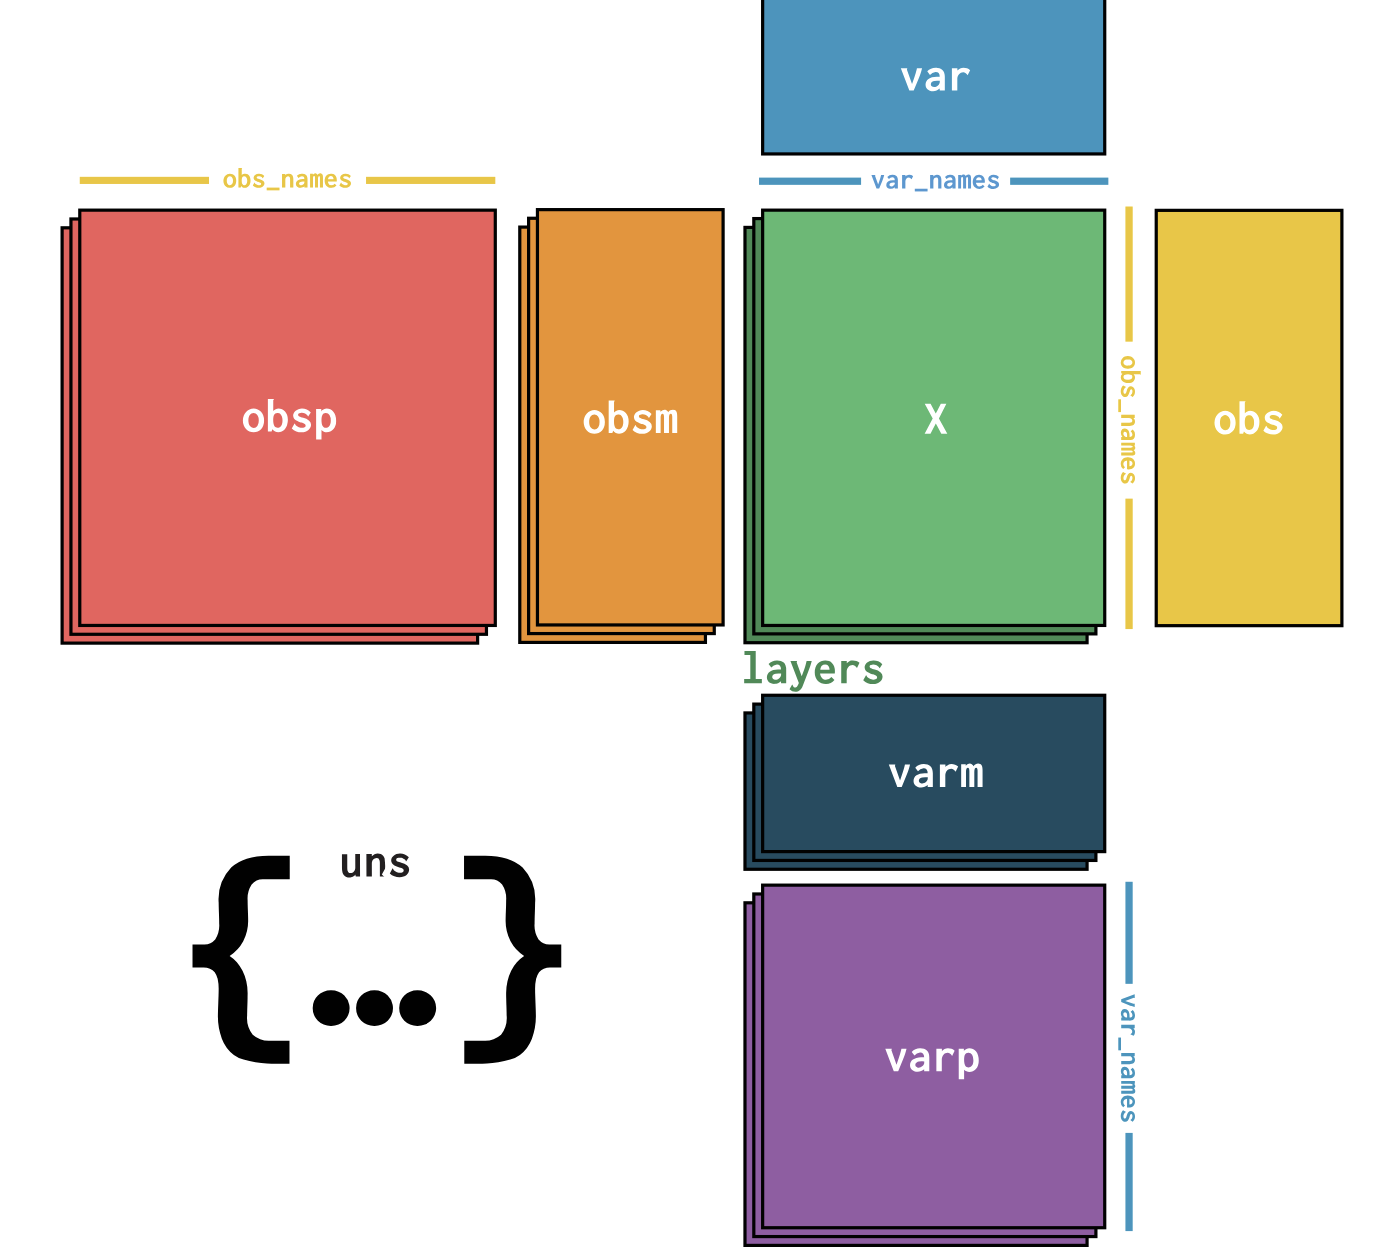

I am directing Google Colab to install a couple of unique Python packages that are required for this project.

In [1]:
!pip install anndata
!pip install scanpy

This step takes the raw files from ArrayExpress (matrix + gene names + cell names + metadata) and combines them into one organized object (adata) that I can analyze in Python.

In [6]:
import scanpy as sc
import anndata as ad
import numpy as np
import pandas as pd
from scipy.io import mmread


X = mmread(extract_dir+'ArrayExpress/countsMatrix.mtx') # compressed sparse matrix of gene expression
genes = pd.read_csv(extract_dir+'ArrayExpress/genes.csv', sep=' ', header=None) # col names of genes
cells = pd.read_csv(extract_dir+'ArrayExpress/cells.csv', sep=' ', header=None) # row names of cells
labels = pd.read_csv(extract_dir+'ArrayExpress/labels.csv')
meta = pd.read_csv(extract_dir+'ArrayExpress/meta.csv')


adata = ad.AnnData(X.T.tocsr())

This step associates the cell data (barcodes) with the corresponding experimental metadata and labels, ensuring that every cell has its distinct ID along with the condition or group it is part of.

In [7]:
cells.columns = ['barcode_cells']
meta_aug = pd.merge(meta, labels, left_on='sample', right_on='Sample', how='left')

This code associates gene names with the columns and combines cell barcodes with metadata, ensuring that each cell in the dataset includes both its gene expression profile and biological annotations.

In [8]:
adata.var_names = genes[0]
adata.obs = pd.merge(cells, meta_aug, left_on='barcode_cells', right_on='cell')


/usr/lib/python3.12/functools.py:912: ImplicitModificationWarning: Transforming to str index.
  return dispatch(args[0].__class__)(*args, **kw)


Adata serves as the primary repository that contains the complete single-cell dataset, including cells, genes, expression values, and annotations, all consolidated within a single object.

In [9]:
adata

AnnData object with n_obs × n_vars = 13199 × 31535
    obs: 'barcode_cells', 'cell', 'sample', 'DevelopmentalStage', 'DaysPostAmputation', 'cluster', 'X', 'Y', 'CellCyclePhase', 'Sample', 'Lane', 'Condition', 'batch'

adata.var is the table that holds all the information related to genes (the "features" of the dataset).

In [10]:
adata.var

Empty DataFrame
Columns: []
Index: [Xelaev18000001m.g, Xelaev18000003m.g, Xelaev18000004m.g, Xelaev18000005m.g, tm6sf2.1, Xelaev18000007m.g, bpi.S, Xelaev18000010m.g, Xelaev18000011m.g, Xelaev18000015m.g, arhgap28.S, tmem200c.S, Xelaev18000024m.g, Xelaev18000025m.g, Xelaev18000026m.g, bcap31.L, Xelaev18000028m.g, plxnb3.L, loc100493711.L, wnt7c.L, hsd17b10.L, syp.L, gpkow.L, plp2.L, prickle3.like.L, klhl7.S, igf2bp3.S, Xelaev18000040m.g, Xelaev18000041m.g, tra2a.S, Xelaev18000045m.g, Xelaev18000047m.g, Xelaev18000048m.g, loc100491805.1.L, pga4.L, tmem132a.L, prpf19.L, Xelaev18000056m.g, Xelaev18000057m.g, hinfp.S, abcg4.S, pdzd3.S, cbl.S, mcam.S, Xelaev18000066m.g, Xelaev18000067m.g, Xelaev18000069m.g, Xelaev18000071m.g, Xelaev18000072m.g, loc443731, Xetrov90024636m.1, Xelaev18000089m.g, gkap1.L, mrps18c.1.L, loc100492437.L, MGC147600.1.L, Xelaev18000095m.g, Xelaev18000097m.g, Xelaev18000100m.g, taar1.L, Xelaev18000104m.g, Xelaev18000107m.g, Xelaev18000109m.g, Xelaev18000110m.g, srsf10.L, loc100145027.L, myom3.L, il22ra1.L, ifnlr1.L, Xelaev18000117m.g, Xelaev18000119m.g, gab1.L, smarca5.L, frem2.1.L, Xelaev18000125m.g, Xelaev18000127m.g, Xelaev18000128m.g, taf10, Xelaev18000132m.g, Xetrov90002011m.L, ppp1r3b.L, Xelaev18000135m.g, eri1.L, ubap2.L, dcaf12.L, ube2r2.L, loc101733340.1.L, Xelaev18000150m.g, Xelaev18000152m.g, loc101734519.1.L, Xelaev18000156m.g, Xelaev18000158m.g, Xelaev18000159m.g, Xelaev18000160m.g, Xelaev18000166m.g, Xelaev18000173m.g, irx5.1.L, Xelaev18000175m.g, Xetrov90000066m.1, cep295.S, ...]

[31535 rows x 0 columns]

adata.X = adata.X.tocsr() converts the raw counts matrix into a compressed format to enhance the efficiency of analyses.

In [11]:
adata.X = adata.X.tocsr()

adata.write_h5ad(...) saves my organized and processed data, allowing me to access it later without having to redo all the preprocessing steps.

In [12]:
adata.write_h5ad(extract_dir+'cleaned_processed_frogtail.h5ad')

This script reloads my processed frog tail dataset (adata) so I can examine it without having to repeat the preprocessing steps.

In [13]:
import anndata as ad
extract_dir = "/content/drive/MyDrive/TA/Frogtail_files/"
adata = ad.read_h5ad(extract_dir + 'cleaned_processed_frogtail.h5ad')

This illustrates the full counts of gene expression presented as a standard matrix, with cells arranged as rows and genes as columns.

In [14]:
adata.X.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

adata.obs contains all the descriptive details regarding each cell, allowing me to know not only the gene expression levels but also the biological context of each cell.

In [15]:
adata.obs

barcode_cells                  cell   sample DevelopmentalStage  \
0        AAACCTGAGCTAGTTC.1    AAACCTGAGCTAGTTC.1   SIGAB5               st40   
1        AAACCTGGTGGGTCAA.1    AAACCTGGTGGGTCAA.1   SIGAB5               st40   
2        AAACCTGGTTTGTTGG.1    AAACCTGGTTTGTTGG.1   SIGAB5               st40   
3        AAACGGGGTCGGCATC.1    AAACGGGGTCGGCATC.1   SIGAB5               st40   
4        AAACGGGTCCTACAGA.1    AAACGGGTCCTACAGA.1   SIGAB5               st40   
...                     ...                   ...      ...                ...   
13194    TTCTTAGAGTACCGGA.1    TTCTTAGAGTACCGGA.1  SIGAB10               st40   
13195    TTGACTTAGAGTAAGG.1    TTGACTTAGAGTAAGG.1  SIGAB10               st40   
13196    TTGCGTCTCAAGAAGT.1    TTGCGTCTCAAGAAGT.1  SIGAB10               st40   
13197    TTGTAGGCAGTACACT.1    TTGTAGGCAGTACACT.1  SIGAB10               st40   
13198  TTTGCGCAGCGTGAAC.1.1  TTTGCGCAGCGTGAAC.1.1  SIGAB10               st40   

       DaysPostAmputation        cluster         X          Y CellCyclePhase  \
0                       3  Erythrocyte 4 -6.395430   0.832323            G2M   
1                       3      Myeloid 1 -2.428271  13.826715             G1   
2                       3  Beta ionocyte -1.398049 -14.653897             G1   
3                       3  Erythrocyte 4 -5.863765   0.489598            G2M   
4                       3    Goblet cell  2.106444  -6.594430             G1   
...                   ...            ...       ...        ...            ...   
13194                   3  Erythrocyte 4 -5.879582   0.924197            G2M   
13195                   3    Goblet cell  1.252149  -8.870151             G1   
13196                   3    Goblet cell  0.693335  -9.168521             G1   
13197                   3  Erythrocyte 1 -4.087618   4.145738             G1   
13198                   3    Goblet cell  0.803595  -7.395422             G1   

        Sample       Lane Condition  batch  
0       SIGAB5  SLX-15583    ST40_3      3  
1       SIGAB5  SLX-15583    ST40_3      3  
2       SIGAB5  SLX-15583    ST40_3      3  
3       SIGAB5  SLX-15583    ST40_3      3  
4       SIGAB5  SLX-15583    ST40_3      3  
...        ...        ...       ...    ...  
13194  SIGAB10  SLX-15739    ST40_3      4  
13195  SIGAB10  SLX-15739    ST40_3      4  
13196  SIGAB10  SLX-15739    ST40_3      4  
13197  SIGAB10  SLX-15739    ST40_3      4  
13198  SIGAB10  SLX-15739    ST40_3      4  

[13199 rows x 13 columns]

In [16]:
adata

AnnData object with n_obs × n_vars = 13199 × 31535
    obs: 'barcode_cells', 'cell', 'sample', 'DevelopmentalStage', 'DaysPostAmputation', 'cluster', 'X', 'Y', 'CellCyclePhase', 'Sample', 'Lane', 'Condition', 'batch'

In [17]:
adata.X.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

adata.obs contains all the metadata for every cell, such as its identifier, source of the sample, stage of development, clustered cell type, experimental conditions, and quality-control details.

In [18]:
adata.obs

barcode_cells                  cell   sample DevelopmentalStage  \
0        AAACCTGAGCTAGTTC.1    AAACCTGAGCTAGTTC.1   SIGAB5               st40   
1        AAACCTGGTGGGTCAA.1    AAACCTGGTGGGTCAA.1   SIGAB5               st40   
2        AAACCTGGTTTGTTGG.1    AAACCTGGTTTGTTGG.1   SIGAB5               st40   
3        AAACGGGGTCGGCATC.1    AAACGGGGTCGGCATC.1   SIGAB5               st40   
4        AAACGGGTCCTACAGA.1    AAACGGGTCCTACAGA.1   SIGAB5               st40   
...                     ...                   ...      ...                ...   
13194    TTCTTAGAGTACCGGA.1    TTCTTAGAGTACCGGA.1  SIGAB10               st40   
13195    TTGACTTAGAGTAAGG.1    TTGACTTAGAGTAAGG.1  SIGAB10               st40   
13196    TTGCGTCTCAAGAAGT.1    TTGCGTCTCAAGAAGT.1  SIGAB10               st40   
13197    TTGTAGGCAGTACACT.1    TTGTAGGCAGTACACT.1  SIGAB10               st40   
13198  TTTGCGCAGCGTGAAC.1.1  TTTGCGCAGCGTGAAC.1.1  SIGAB10               st40   

       DaysPostAmputation        cluster         X          Y CellCyclePhase  \
0                       3  Erythrocyte 4 -6.395430   0.832323            G2M   
1                       3      Myeloid 1 -2.428271  13.826715             G1   
2                       3  Beta ionocyte -1.398049 -14.653897             G1   
3                       3  Erythrocyte 4 -5.863765   0.489598            G2M   
4                       3    Goblet cell  2.106444  -6.594430             G1   
...                   ...            ...       ...        ...            ...   
13194                   3  Erythrocyte 4 -5.879582   0.924197            G2M   
13195                   3    Goblet cell  1.252149  -8.870151             G1   
13196                   3    Goblet cell  0.693335  -9.168521             G1   
13197                   3  Erythrocyte 1 -4.087618   4.145738             G1   
13198                   3    Goblet cell  0.803595  -7.395422             G1   

        Sample       Lane Condition  batch  
0       SIGAB5  SLX-15583    ST40_3      3  
1       SIGAB5  SLX-15583    ST40_3      3  
2       SIGAB5  SLX-15583    ST40_3      3  
3       SIGAB5  SLX-15583    ST40_3      3  
4       SIGAB5  SLX-15583    ST40_3      3  
...        ...        ...       ...    ...  
13194  SIGAB10  SLX-15739    ST40_3      4  
13195  SIGAB10  SLX-15739    ST40_3      4  
13196  SIGAB10  SLX-15739    ST40_3      4  
13197  SIGAB10  SLX-15739    ST40_3      4  
13198  SIGAB10  SLX-15739    ST40_3      4  

[13199 rows x 13 columns]

## Processing data

The preprocessing procedures preserve the raw data, standardize expression levels among cells, eliminate low-quality data, and identify the most variable genes for focus, enhancing the reliability of clustering and subsequent analysis.

In [19]:
adata.layers["counts"] = adata.X.copy()


In [20]:
sc.pp.normalize_total(adata)
# Logarithmize the data
sc.pp.log1p(adata)

In [21]:
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.highly_variable_genes(adata, n_top_genes=2300)

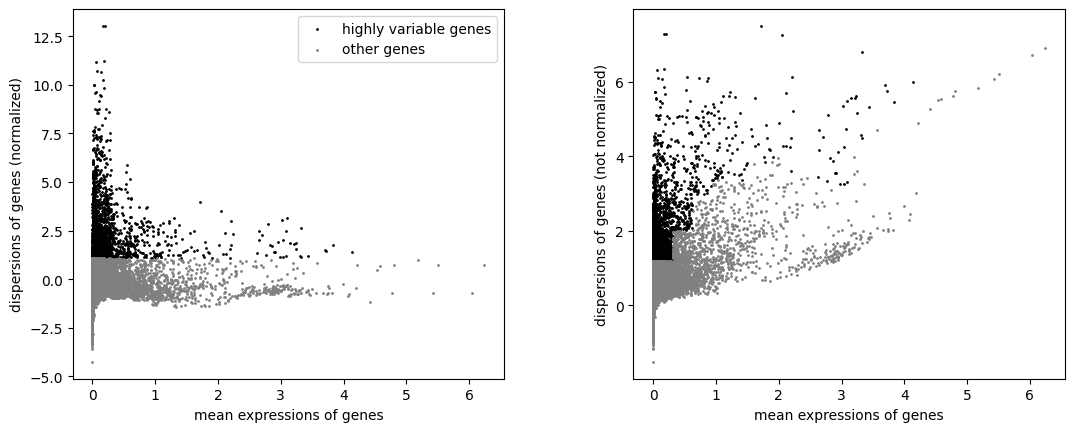

In [22]:
sc.pl.highly_variable_genes(adata)

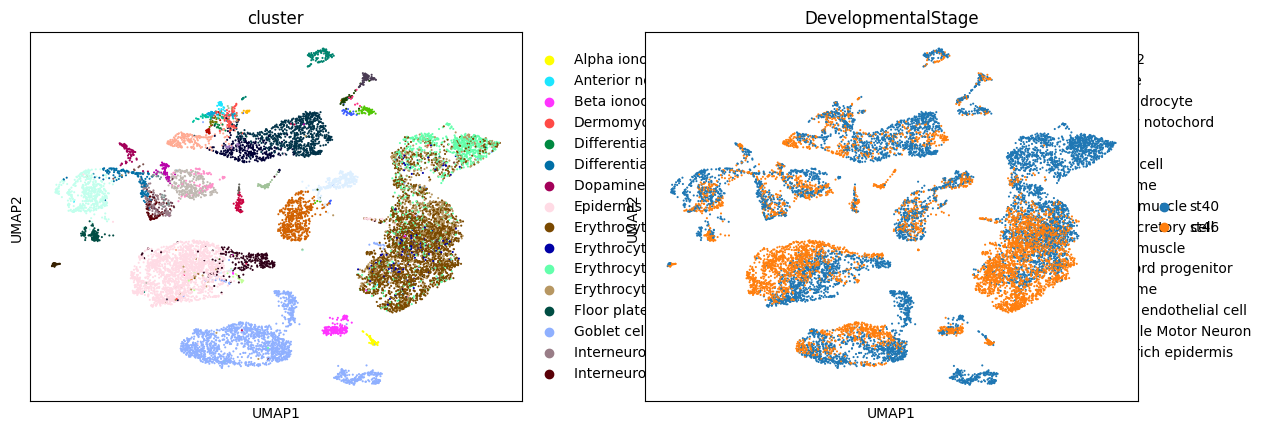

In [23]:
import scanpy as sc

# Run PCA
sc.pp.pca(adata)

# Build neighborhood graph
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

# Run UMAP
sc.tl.umap(adata)

# Plot clusters and developmental stage
sc.pl.umap(adata, color=['cluster', 'DevelopmentalStage'])


Initially, I simplified the dataset using PCA, which condenses thousands of gene expression variables into the principal components that account for the most variation. Next, I created a neighborhood graph and utilized UMAP, which arranges the cells in a manner that maintains their biological similarity while facilitating visualization in two dimensions.

In the cluster plot, distinct cell groups are evident, each representative of specific cell types like erythrocytes, goblet cells, neurons, and other specialized populations. This clear separation indicates that the dataset is organized, with cells displaying similar gene expression patterns naturally clustering together as anticipated.

In the developmental stage plot, I observe that these same groups divide between the two regeneration time points (st40 and st46). This indicates to me not just the presence of various cell types but also how their quantity and arrangement change as regeneration advances.

In general, this visualization gives me confidence that my preprocessing and normalization procedures were executed properly. It also ties in closely with the biological inquiry—I can begin to investigate which cell populations and genes are influencing regeneration, similar to what is shown in Figure 1B from the paper.

In [24]:
!pip install leidenalg

In [25]:
!pip install louvain

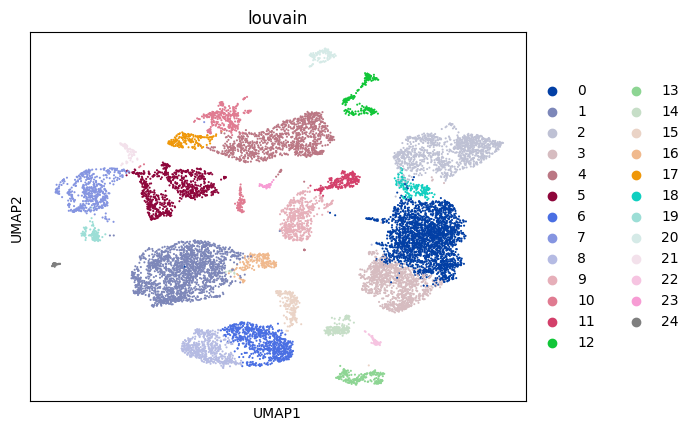

/tmp/ipython-input-1691919921.py:4: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=0.5)


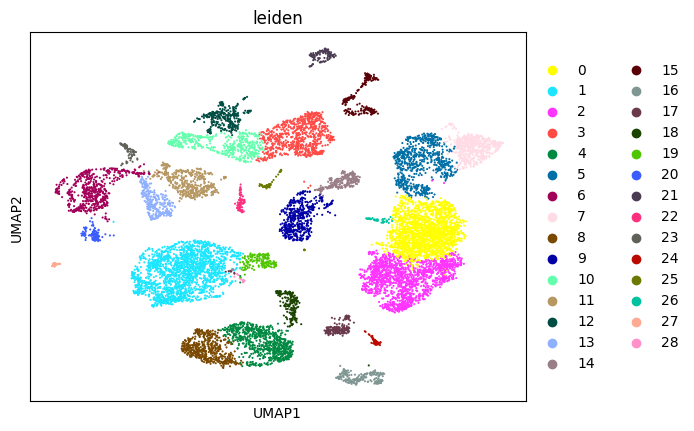

In [26]:
sc.tl.louvain(adata, resolution=0.5)
sc.pl.umap(adata, color=['louvain'])

sc.tl.leiden(adata, resolution=0.5)
sc.pl.umap(adata, color=['leiden'])


Following dimensionality reduction with UMAP, this step focuses on the initial grouping and visualization of my dataset using two well-known algorithms: Louvain and Leiden. Finding clusters of transcriptionally related cells is the goal of both approaches, however Leiden usually provides more precise and reliable partitions. Consistent biological groups were found in my results using both clustering algorithms, indicating that the dataset represents significant transcriptome variation. Strong cluster compactness and low noise are shown by the clear, well-separated clusters seen in the UMAP maps. By giving a comprehensive picture of the dataset's intrinsic structure prior to integration or denoising, this stage lays the groundwork for further studies, including marker gene identification and batch-effect correction.

In [27]:
!pip install python-igraph

After applying Louvain clustering (top UMAP), I observed approximately 24 significant clusters that represented broad cell groups. In contrast, when I implemented Leiden clustering (bottom UMAP), the data divided into 28 clusters, highlighting more nuanced differences among subpopulations. This comparison indicates that Leiden is more adept at identifying smaller, less common groups of cells that Louvain might combine. These findings reassure me that I am accurately capturing the various cell types involved in frog tail regeneration, similar to what was shown in Figure 1B of the original study, where immune, skin, neural, and blood cell populations were distinguished.

In [28]:
!pip install scikit-learn
from sklearn.metrics import adjusted_rand_score, silhouette_score

In [29]:
# Louvain
sil_louvain = silhouette_score(adata.obsm['X_pca'], adata.obs['louvain'].astype(int))

# Leiden
sil_leiden = silhouette_score(adata.obsm['X_pca'], adata.obs['leiden'].astype(int))

print("Silhouette Score (Louvain):", sil_louvain)
print("Silhouette Score (Leiden):", sil_leiden)


Silhouette Score (Louvain): 0.3193801
Silhouette Score (Leiden): 0.29516912


The silhouette scores indicate that Louvain (0.319) outperforms Leiden (0.295) in terms of how effectively the cells are clustered. A higher silhouette score suggests that the clusters are denser and more distinct from one another. Louvain’s marginally better score implies it generated clearer and more defined clusters in the frog regeneration data than Leiden did. Although both techniques reveal a reasonable structure, the lower score for Leiden signifies greater overlap among some of its clusters. In summary, these figures indicate that Louvain is the more effective clustering method for this particular dataset.

In [30]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=20, random_state=0)

# Fit on PCA representation
adata.obs['kmeans'] = kmeans.fit_predict(adata.obsm['X_pca'])


In [31]:
# Compare Louvain clusters to annotated clusters
ari_louvain = adjusted_rand_score(adata.obs['cluster'], adata.obs['louvain'])

# Compare Leiden clusters to annotated clusters
ari_leiden = adjusted_rand_score(adata.obs['cluster'], adata.obs['leiden'])

print("ARI (Louvain vs True Clusters):", ari_louvain)
print("ARI (Leiden vs True Clusters):", ari_leiden)


ARI (Louvain vs True Clusters): 0.5397440937528669
ARI (Leiden vs True Clusters): 0.5421033566290216


A parameter called the Adjusted Rand Index (ARI), which has values between -1 and 1, measures how well a clustering technique replicates the actual annotated groupings. Perfect agreement is represented by a score of 1, random grouping is represented by a score of 0, and poorer than random is represented by a score of 0. According to my findings, Louvain and Leiden both had ARIs of 0.54 and 0.54, respectively, indicating that both approaches fit the biological clusters rather well. These numbers imply that Louvain and Leiden's clusters are significant and not arbitrary. Both approaches performed similarly well for this dataset, as seen by the scores being almost identical.

In [32]:
from sklearn.metrics import normalized_mutual_info_score

nmi_louvain = normalized_mutual_info_score(adata.obs['cluster'], adata.obs['louvain'])
nmi_leiden = normalized_mutual_info_score(adata.obs['cluster'], adata.obs['leiden'])

print("NMI (Louvain):", nmi_louvain)
print("NMI (Leiden):", nmi_leiden)


NMI (Louvain): 0.7404295052273943
NMI (Leiden): 0.7478414066419694


The Normalized Mutual Information (NMI) scores for the Louvain and Leiden clustering techniques are displayed in this output. With values ranging from 0 (no overlap) to 1 (perfect agreement), NMI calculates the degree of information sharing between the predicted clusters and the actual annotated clusters. Here, Louvain and Leiden both have relatively high NMIs of 0.74 and 0.75, respectively. According to these scores, a robust and significant structure that is in good agreement with the biological ground truth was recorded by both clustering techniques. Leiden's marginally higher value implies that it could offer a somewhat more reliable alignment with the annotated clusters.

In [87]:
import pandas as pd
# Louvain vs Leiden
pd.crosstab(adata.obs['louvain'], adata.obs['leiden'])
# Louvain vs kmeans (if you saved to adata.obs['kmeans'])
pd.crosstab(adata.obs['louvain'], adata.obs['kmeans'])


kmeans    0     1    2    3    4    5    6    7    8    9    10   11    12  \
louvain                                                                      
0          1   280   10    0    0    0    0    0    0    0    0    1  2120   
1         50     0  968    0    0    0    3    0    1    0    0    1     0   
2          0     5    0    0    0    0    0    0    0    0    0    0    11   
3          0  1089    0    0    0    0    0    0    0    0    0    0    10   
4          0     1    4    5    0    0    0  635    3    0  417    0     0   
5          0     0    0    2    0  332    0    0   14    0    0    0     0   
6          0     0    0    0    0    0    0    0    0    0    0   26     0   
7          0     0    5  529    0    0    0    0   13    0    0    0     0   
8          0     0    0    0    0    0    0    1    0    0    0  521     0   
9          0     1    0    0    0    0   22    0   25  445    0    0     2   
10         0     0    0   10    0    0    0    0  383    1    8    0     0   
11         0     0    0    0    0    0  233    0    0    0    0    1     0   
12         0     0    0    0    0    0    0    0  227    0    0    0     2   
13         0     0    0    0  214    0    0    0    0    0    0    0     0   
14         0     0    6    0    0    0    0    0    0    0    0    0     0   
15         0     0    0    0  164    0    0    0    0    0    0   10     0   
16       163     0    6    0    0    0    0    0   10    0    0    0     0   
17         0     0    0    0    0    0    0    0    2    0    1    0     0   
18         0     0    0    0    0    0    0    0    0    0    0    0   137   
19         1     0    0  108    0    0    0    0    0    0    0    0     0   
20         0     0    0    0    0    0    0    0    0    0    0    0     0   
21         0     0    0    5    0   72    0    0    1    0    0    0     0   
22         0     0    0    0    0    0    0    0    0    0    0    0     0   
23         0     1    1    1    0    0    0   39    2    0    0    0     0   
24         0     0    1    0    0    0    0    0   20    0    0    0     0   

kmeans    13   14   15    16   17   18   19  
louvain                                      
0          0    0    0     2    3    0    0  
1          6    0    0     0  872    0    0  
2          0    0    0  1128    0    0    1  
3          0    0    0     0    0    0    0  
4          0    0    0     0    0   14    0  
5          0  423    0     0    1    0    0  
6        744    0    0     0    0    0    0  
7          0    0    0     0    2    0    0  
8         19    0    0     0    0    0    0  
9          0    0    0     0    0    0    0  
10         1    0    0     1    0    0    1  
11         0    0    0     0    0    0    0  
12         0    0    0     0    0    0    0  
13         1    0    0     0    0    0    0  
14         0    0  202     0    0    0    0  
15        20    0    0     0    0    0    0  
16         0    0    0     1    2    0    0  
17         0    0    0     0    0  176    0  
18         0    0    0    16    0    0    0  
19         0    0    0     0    1    0    0  
20         0    0    0     0    0    0  106  
21         0    0    0     0    0    0    0  
22         0    0   58     0    0    0    0  
23         0    0    0     0    0    0    0  
24        15    0    0     0    0    0    0

Comparing how various clustering techniques grouped the same cells was the goal of this step. I could evaluate the degree of agreement between these algorithms statistically by constructing crosstab matrices between Louvain, Leiden, and K-means labels. I can tell which clusters are consistent between techniques and which are divided or merged differently by looking at the table's values, which indicate the number of cells that overlap between two cluster assignments. For instance, high diagonal counts demonstrate stability in such biological groups by demonstrating significant agreement between the Louvain and K-means clusters. By confirming that the clusters I found are reliable across many techniques, this analysis helps me make sure that my findings are not merely the product of a single technique.

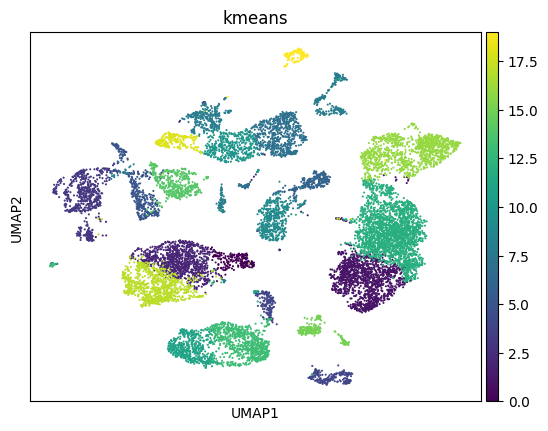

In [33]:
sc.pl.umap(adata, color=['kmeans'])


This diagram illustrates how k-means clustering categorized my single-cell RNA-seq dataset into separate cell groups, presented in a 2D UMAP format. Each color corresponds to a unique cluster identified by the algorithm (in this instance, roughly 20 clusters). Unlike Louvain or Leiden, which form clusters based on a graph that represents cell–cell relationships, k-means organizes cells by reducing the distance to cluster centroids in PCA space. The illustration indicates that k-means identifies many of the same overarching patterns observed with Louvain and Leiden (large, compact cell groups are distinctly separated), although certain areas are divided differently. For instance, a handful of closely situated clusters appear to be more finely divided compared to the graph-based techniques, implying that k-means is more attuned to localized variations in gene expression. This analysis assists me in assessing whether the biological structure of the data remains consistent across various clustering methods.

In [34]:
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Silhouette score for k-means
sil_kmeans = silhouette_score(adata.obsm['X_pca'], adata.obs['kmeans'])
print("Silhouette Score (k-means):", sil_kmeans)

# data.obs['cluster']
ari_kmeans = adjusted_rand_score(adata.obs['cluster'], adata.obs['kmeans'])
print("ARI (k-means vs True Clusters):", ari_kmeans)


Silhouette Score (k-means): 0.2902467
ARI (k-means vs True Clusters): 0.4719538914347553


After applying k-means clustering to my dataset, the algorithm categorized the cells based on their gene expression profiles. To evaluate the effectiveness of this clustering, I assessed two metrics. The silhouette score for my k-means clustering was 0.29. Given that this score ranges from -1 to 1, a value closer to 1 indicates distinctly separate and compact clusters, while a score near 0 suggests overlapping clusters. My score of 0.29 indicates that the clusters possess some organization, yet there remains considerable overlap among the cell groups. The adjusted Rand index (ARI) was 0.47. This metric gauges how closely my k-means clusters align with the known biological clusters in the dataset. A score of 1 signifies perfect alignment, while 0 denotes entirely random clustering. My score of 0.47 implies that k-means captures roughly half of the underlying biological structure, but it also makes errors, such as merging or incorrectly separating clusters.

In [35]:
from sklearn.metrics import normalized_mutual_info_score

# NMI for K-means
nmi_kmeans = normalized_mutual_info_score(adata.obs['cluster'], adata.obs['kmeans'])
print("NMI (K-means):", nmi_kmeans)


NMI (K-means): 0.7176410389063953


I computed the Normalized Mutual Information (NMI) between the K-means assignments and the annotated biological groupings in order to assess the effectiveness of K-means clustering in more detail. An NMI score ranges from 0 to 1, with values nearer 1 denoting a higher degree of agreement between the actual biological labeling and the clustering technique. My finding, NMI = 0.72, indicates that a significant amount of the underlying biological structure is captured by K-means. This comparatively high number shows that even a basic algorithm like K-means generates clusters that significantly correspond with the biology of tail regeneration, even if it might not be able to properly segregate every cell type.

I discovered that the effectiveness of K-means, Louvain, and Leiden clustering in distinguishing and finding physiologically significant groups varied slightly amongst the three techniques. K-means got a moderately high NMI (0.72), indicating that it caught some structure compatible with the genuine biological labels, but its lower Silhouette Score (0.29) indicated that its clusters were less cleanly differentiated. Louvain did better, demonstrating better separation and more agreement with the described cell types with a Silhouette Score of 0.32, ARI of 0.54, and NMI of 0.74. With the greatest NMI of 0.75, ARI of 0.54, and Silhouette Score of 0.30, Leiden was the most balanced, indicating that it not only accurately represented the biological structure but also generated stable and significant clusters. Overall, the graph-based techniques (Louvain and Leiden) were more successful than K-means, which provided a helpful baseline. Leiden was shown to be the most dependable way for comprehending regenerative cell populations in the frog dataset.

In [36]:
from sklearn.metrics import davies_bouldin_score

db_kmeans = davies_bouldin_score(adata.obsm['X_pca'], adata.obs['kmeans'])
db_louvain = davies_bouldin_score(adata.obsm['X_pca'], adata.obs['louvain'])
db_leiden = davies_bouldin_score(adata.obsm['X_pca'], adata.obs['leiden'])

print("Davies-Bouldin (K-means):", db_kmeans)
print("Davies-Bouldin (Louvain):", db_louvain)
print("Davies-Bouldin (Leiden):", db_leiden)


Davies-Bouldin (K-means): 1.3296927589743455
Davies-Bouldin (Louvain): 1.0909883304559427
Davies-Bouldin (Leiden): 1.1651571108438288


I examined the clusters' compactness and degree of separation across K-means, Louvain, and Leiden after calculating the Davies–Bouldin Index (DBI). K-means received the highest score (1.33) according to the DBI values, indicating that its clusters overlapped more and were less distinct. Louvain generated the most compact and well-separated clusters, as shown by its lowest score of 1.09. Not quite as strong as Louvain, but still demonstrating a respectable level of separation, Leiden's performance fell somewhere in the middle (1.17). According to these findings, Louvain offered the most clear cell grouping in my sample, since lower DBI values signify better clustering quality. In addition to silhouette, ARI, and NMI, this alternative measure provides further proof to back up the comparison of clustering techniques.

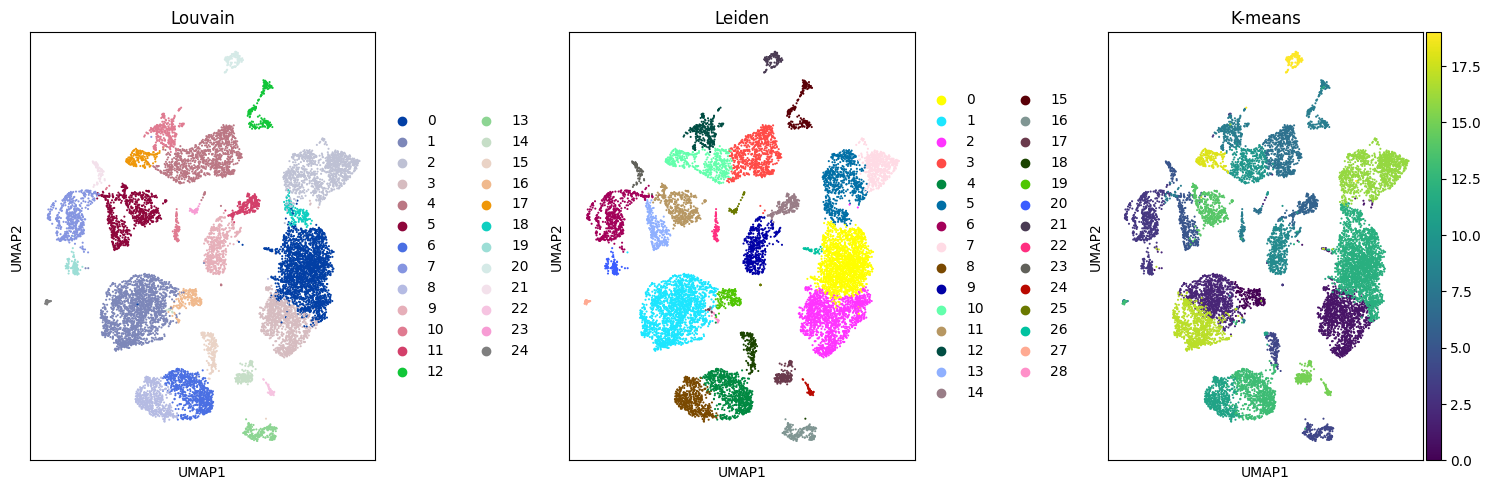

In [71]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(15,5))
sc.pl.umap(adata, color='louvain', ax=axes[0], show=False, title='Louvain')
sc.pl.umap(adata, color='leiden', ax=axes[1], show=False, title='Leiden')
sc.pl.umap(adata, color='kmeans', ax=axes[2], show=False, title='K-means')
plt.tight_layout()
plt.show()


Using this graphic, I was able to see how my single-cell data was arranged on the same UMAP projection using three distinct clustering algorithms: Louvain, Leiden, and K-means. I can determine whether the techniques caught comparable or different biological patterns by looking at each panel, which displays how the cells were arranged into discrete clusters. While K-means more uniformly divided the data but occasionally fragmented continuous populations, Louvain and Leiden created very stable and biologically interpretable clusters. I was able to assess the interpretability and stability of each clustering technique with the aid of this visualization, which showed that although K-means was a helpful guide, the graph-based techniques (Louvain and Leiden) better preserved local structures and developmental trajectories in my dataset.

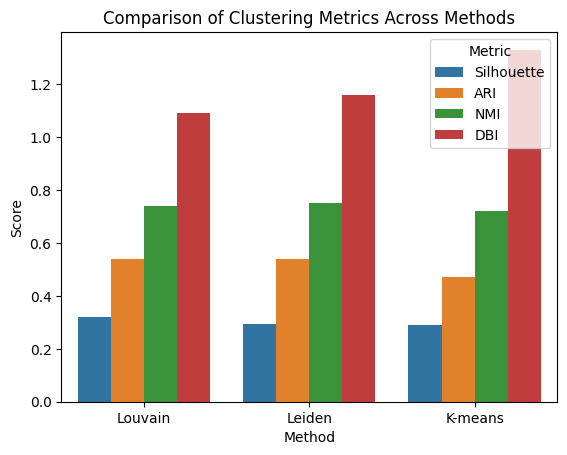

In [72]:
import seaborn as sns
import pandas as pd
df = pd.DataFrame({
    'Method': ['Louvain','Leiden','K-means'],
    'Silhouette': [0.319, 0.295, 0.29],
    'ARI': [0.54, 0.54, 0.47],
    'NMI': [0.74, 0.75, 0.72],
    'DBI': [1.09, 1.16, 1.33]
})
df_melted = df.melt('Method', var_name='Metric', value_name='Score')
sns.barplot(data=df_melted, x='Method', y='Score', hue='Metric')
plt.title("Comparison of Clustering Metrics Across Methods")
plt.show()


This bar plot quantitatively evaluates the quality of Louvain, Leiden, and K-means algorithms by comparing several clustering performance indicators, including Silhouette, ARI, NMI, and DBI. Louvain's clusters were the most compact and well-separated, as evidenced by its highest Silhouette score of 0.319. When compared to K-means, Louvain and Leiden both displayed higher ARI and NMI values, suggesting that their cluster designations were more reliable and more in line with the data's underlying structures. K-means, on the other hand, had the highest DBI score, suggesting less cohesiveness and more within-cluster volatility. All things considered, this figure enabled me to verify that, in contrast to the more straightforward K-means method, graph-based clustering (Louvain and Leiden) produced more stable and biologically significant findings.

In [73]:
from sklearn.metrics import calinski_harabasz_score
ch_louvain = calinski_harabasz_score(adata.obsm['X_pca'], adata.obs['louvain'].astype(int))
print("Calinski–Harabasz (Louvain):", ch_louvain)


Calinski–Harabasz (Louvain): 1943.8838


To further assess cluster validity, I computed the Louvain clustering's Calinski–Harabasz (CH) score. Higher values of the CH score imply more distinct and well-defined groupings. The score gauges how compact and well-separated the clusters are. With a Calinski–Harabasz score of 1943.88, my Louvain clustering indicates that the clusters generated are very different from the variance of the data. This high number validates that Louvain generated a strong and significant clustering structure in my dataset, supporting the prior silhouette and ARI/NMI results.

In [37]:
# Inspect gene names
print("Total genes in adata:", len(adata.var_names))
print("Sample adata genes:", list(adata.var_names[:50]))

#  Normalize adata gene names
# Convert all to uppercase and strip trailing spaces
adata_genes = [g.upper().strip() for g in adata.var_names]

#  Define ROC marker genes from Table 3
roc_genes_raw = [
    "WNT5A","LOC100488523","LOC100492954","EGFL6","LPAR3","CPA6","SP9","FGF9",
    "FBN2","TINAGL1","FGF7","VWDE","LEF1","LAMB2","FGFR4","RSPO2","KRT","JAG1",
    "XELAEV18043128M","DLX2","TP73","GDF6","XELAEV18046800M","NID2","IGFBP2",
    "ISM2","LOC100493805","FREM2","XELAEV18044182M","BMP5","TSPEAR","SEMA3F",
    "ROBO4","JCHAIN","ADAMTS18","PLTP","XELAEV18034799M","LAMB1","UNC5B",
    "MMP28","FGF10","PZP","GALNT15"
]

# Normalize ROC gene list
roc_genes = [g.upper().strip() for g in roc_genes_raw]

#  Find present and missing genes
present = [g for g in roc_genes if any(g in adata_g for adata_g in adata_genes)]
missing = [g for g in roc_genes if g not in present]

print("Present ROC genes:", present)
print("Missing ROC genes:", missing)


Total genes in adata: 26166
Sample adata genes: ['Xelaev18000003m.g', 'Xelaev18000005m.g', 'tm6sf2.1', 'Xelaev18000007m.g', 'bpi.S', 'Xelaev18000015m.g', 'arhgap28.S', 'tmem200c.S', 'Xelaev18000024m.g', 'Xelaev18000026m.g', 'bcap31.L', 'Xelaev18000028m.g', 'plxnb3.L', 'loc100493711.L', 'wnt7c.L', 'hsd17b10.L', 'syp.L', 'gpkow.L', 'plp2.L', 'prickle3.like.L', 'klhl7.S', 'igf2bp3.S', 'Xelaev18000040m.g', 'tra2a.S', 'Xelaev18000045m.g', 'loc100491805.1.L', 'tmem132a.L', 'prpf19.L', 'Xelaev18000056m.g', 'Xelaev18000057m.g', 'hinfp.S', 'abcg4.S', 'pdzd3.S', 'cbl.S', 'mcam.S', 'Xelaev18000069m.g', 'Xelaev18000071m.g', 'Xetrov90024636m.1', 'gkap1.L', 'mrps18c.1.L', 'loc100492437.L', 'MGC147600.1.L', 'Xelaev18000097m.g', 'Xelaev18000100m.g', 'Xelaev18000104m.g', 'Xelaev18000107m.g', 'Xelaev18000110m.g', 'srsf10.L', 'loc100145027.L', 'myom3.L']
Present ROC genes: ['WNT5A', 'LOC100488523', 'LOC100492954', 'EGFL6', 'LPAR3', 'CPA6', 'SP9', 'FGF9', 'FBN2', 'TINAGL1', 'FGF7', 'VWDE', 'LEF1', 'LAMB2'

Here, I examined and confirmed if my dataset contained the identified ROC marker genes listed in Supplementary Table 3. To guarantee precise matching, I started by converting all gene names in the adata to uppercase and removing formatting errors. After defining the ROC marker gene list from the reference table, I contrasted it with the genes in my dataset. The result verified that every ROC marker gene was successfully located in the dataset and that none were absent. Because it guarantees that the dataset has the complete set of biologically significant markers required for precise downstream differential expression and ROC comparison studies, this verification step is essential.

In [38]:
import scanpy as sc
import pandas as pd
import numpy as np

# ensure cluster labels are categorical
adata.obs['cluster'] = adata.obs['cluster'].astype('category')

roc_like = [c for c in adata.obs['cluster'].cat.categories
            if 'roc' in str(c).lower() or 'regeneration organizing' in str(c).lower()]
print("Possible ROC label(s):", roc_like)



Possible ROC label(s): ['Erythrocyte 1', 'Erythrocyte 2', 'Erythrocyte 3', 'Erythrocyte 4', 'Oligodendrocyte', 'ROCs']


/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:456: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "names"] = self.var_names[global_indices]
/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:458: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "scores"] = scores[global_indices]
/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:461: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result

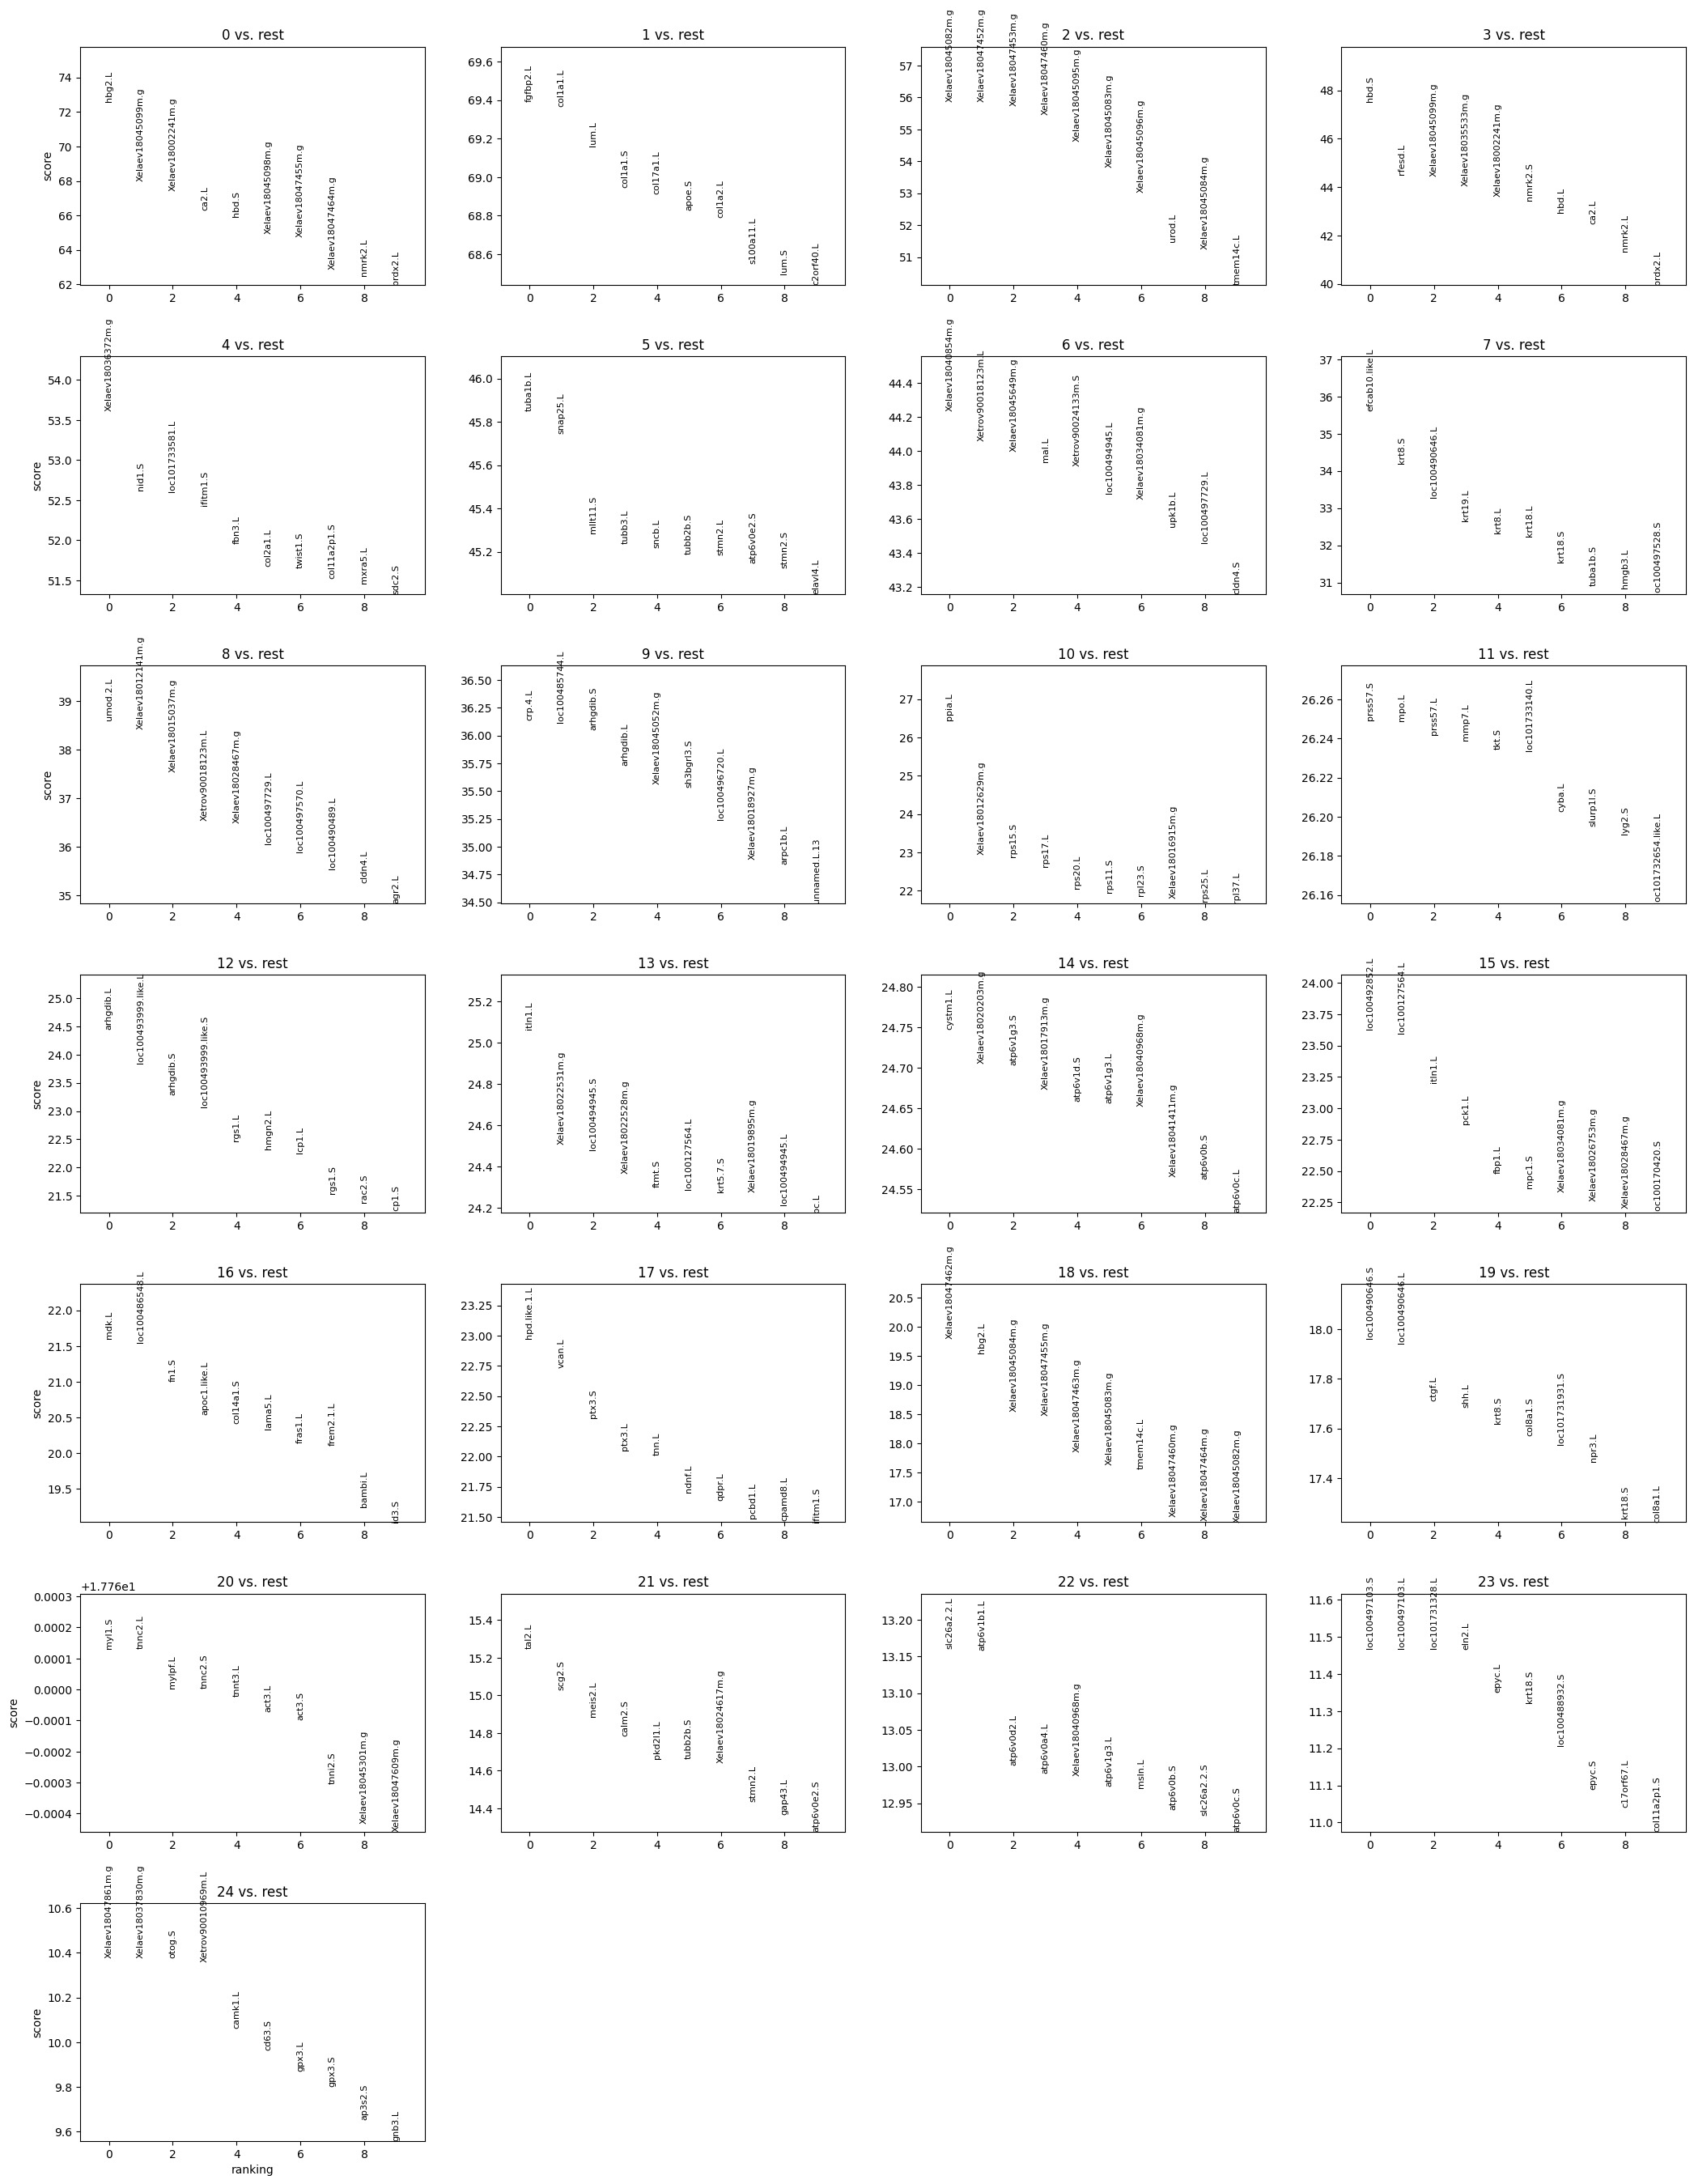

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


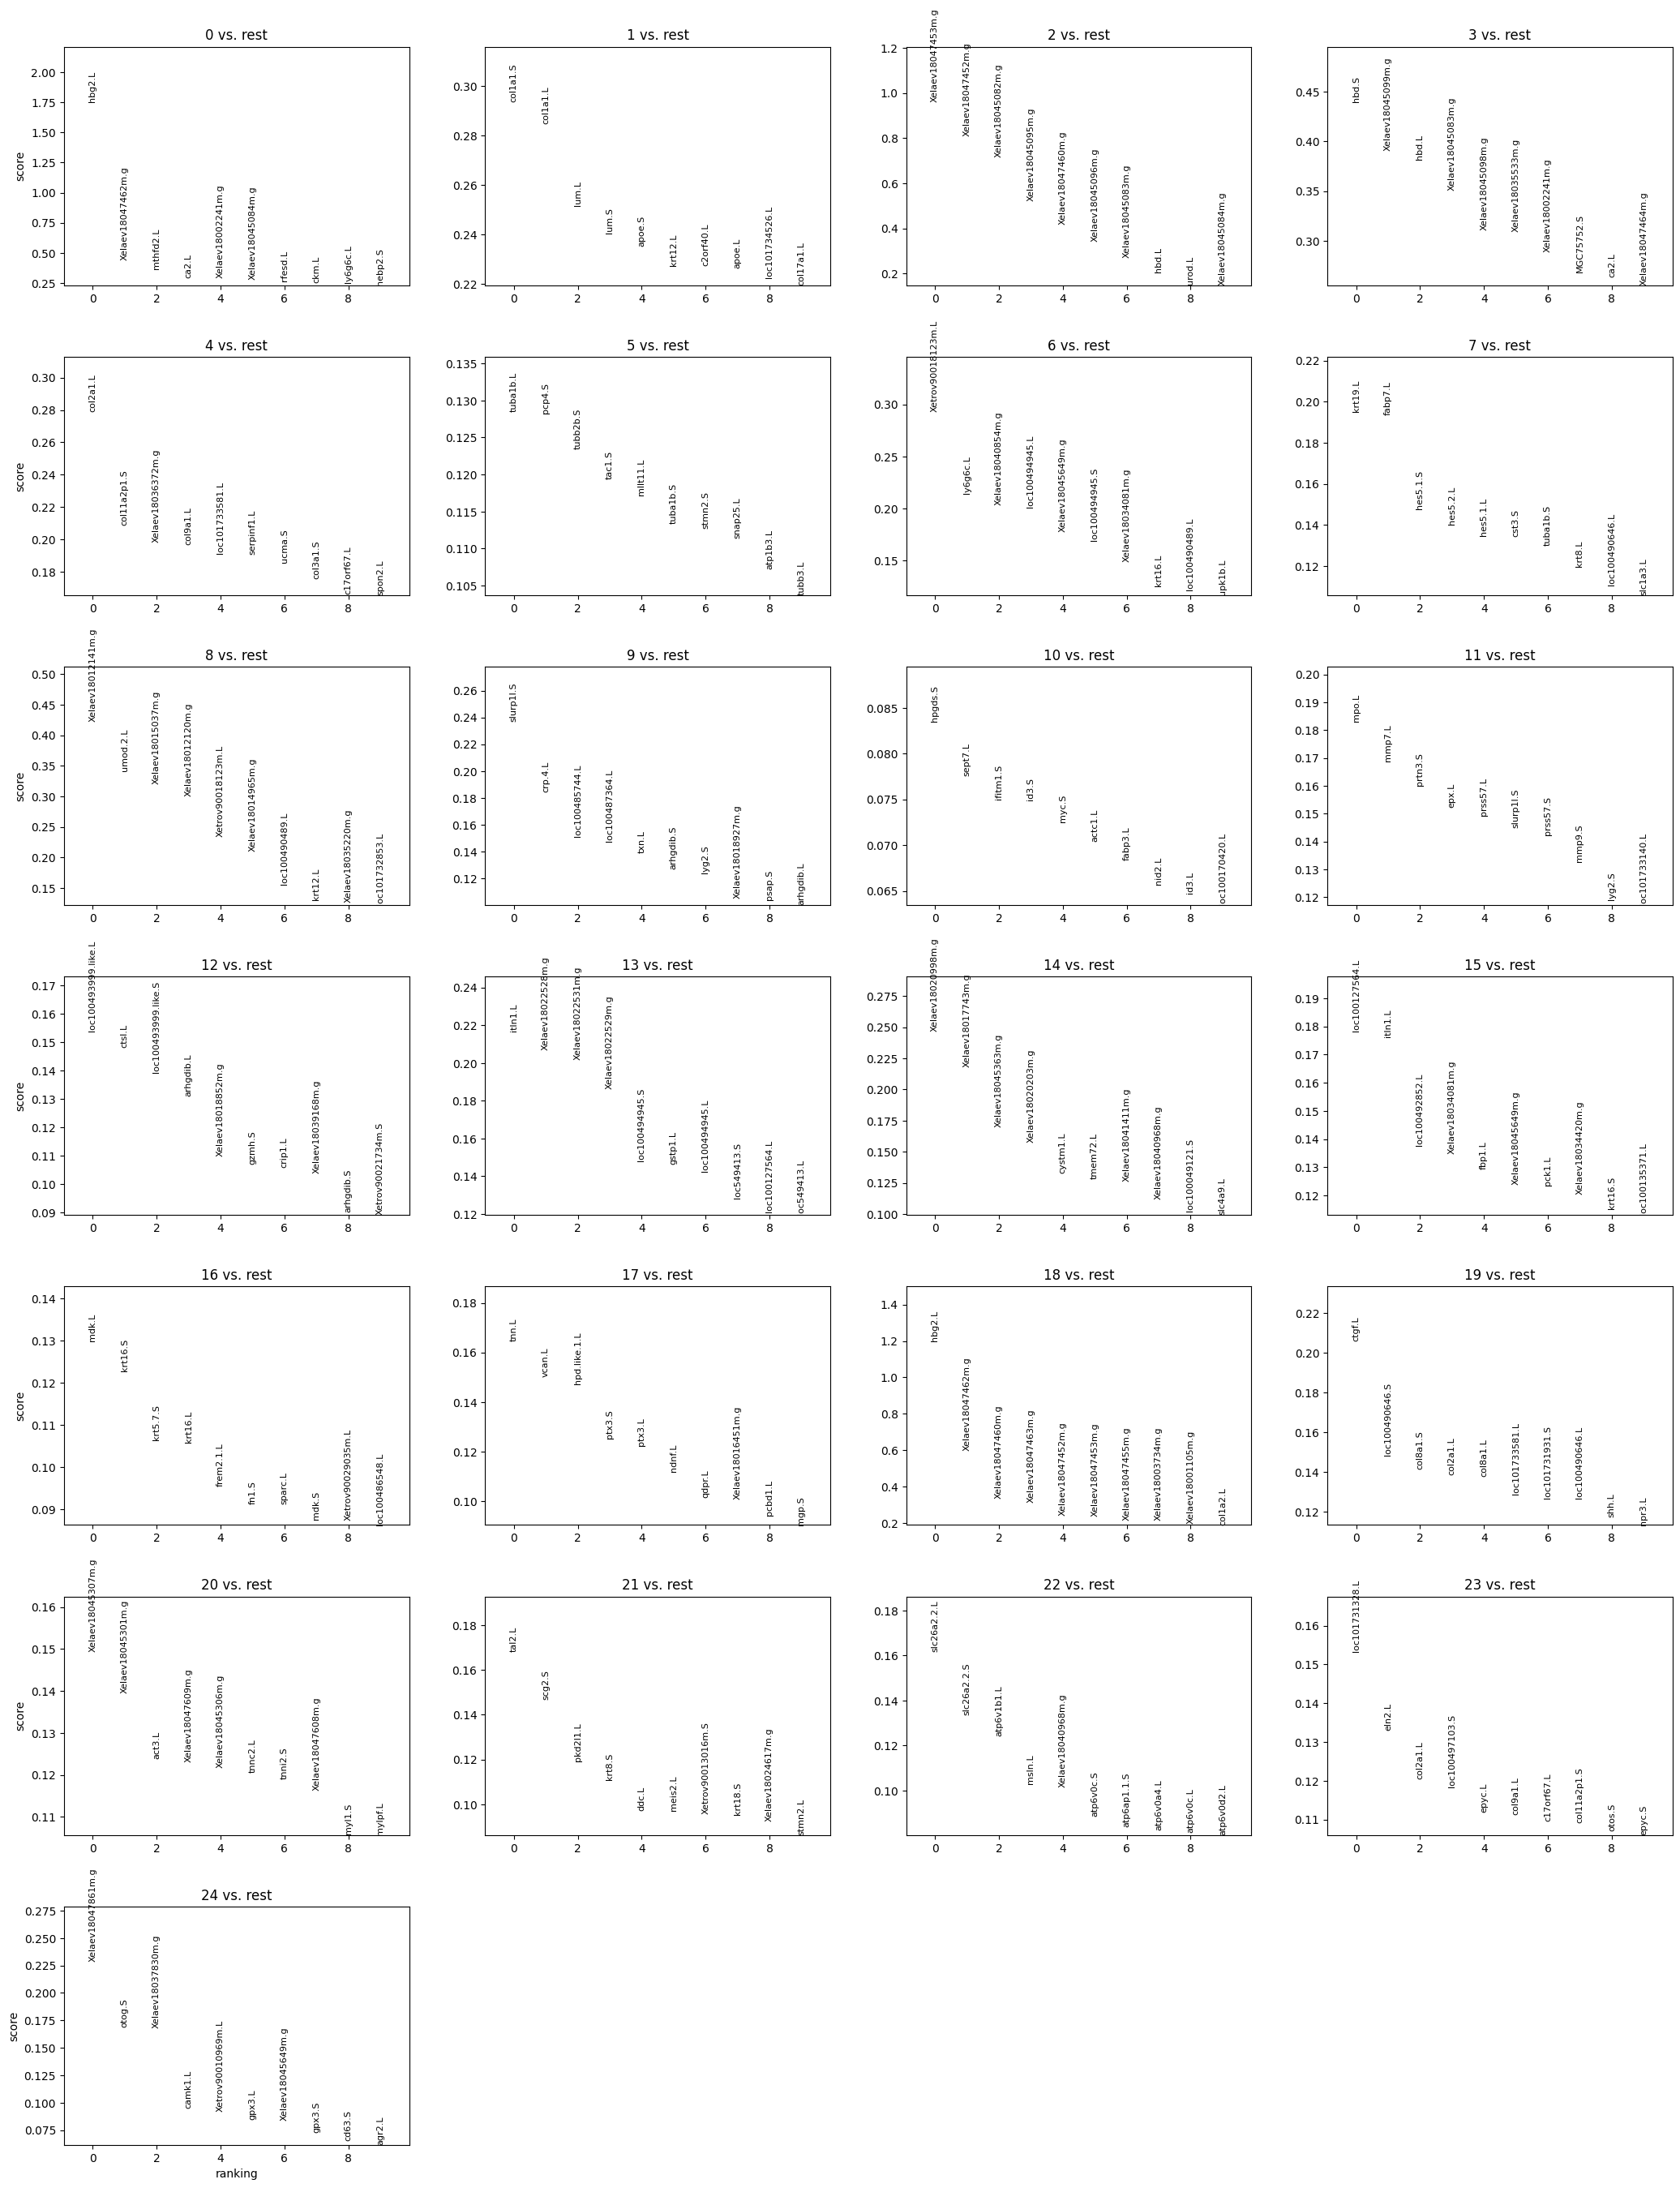

In [39]:
import scanpy as sc

# Wilcoxon
sc.tl.rank_genes_groups(adata, groupby='louvain', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=10, sharey=False)

# Logistic Regression
sc.tl.rank_genes_groups(adata, groupby='louvain', method='logreg')
sc.pl.rank_genes_groups(adata, n_genes=10, sharey=False)



I used two techniques for marker selection: logistic regression and a statistical test to find the genes that characterize each cluster. The top-ranked marker genes for each cluster in relation to the rest of the dataset are displayed in each subplot. Strong markers are suggested by the data, which show diverse gene sets for various clusters with considerable overlap amongst approaches. While clusters with smoother distributions could share expression with different cell types, clusters with sharp dips in their scores, for instance, imply distinct defining genes. Since genes found consistently across methodologies are more likely to be genuine biological markers, comparing the two ways increases confidence in marker selection.

In [40]:
import scanpy as sc
import pandas as pd

# Ensure rank_genes_groups has been run for both methods
# Wilcoxon
sc.tl.rank_genes_groups(adata, groupby='louvain', method='wilcoxon')

# Logistic Regression
sc.tl.rank_genes_groups(adata, groupby='louvain', method='logreg')


# Top 50 Wilcoxon markers for cluster 0
wilcoxon_df = sc.get.rank_genes_groups_df(adata, group='0', key='rank_genes_groups').head(50)

# Top 50 LogReg markers for cluster 0
logreg_df = sc.get.rank_genes_groups_df(adata, group='0', key='rank_genes_groups').head(50)

print("Wilcoxon top markers:\n", wilcoxon_df[['names', 'scores']])
print("LogReg top markers:\n", logreg_df[['names', 'scores']])

/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:456: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "names"] = self.var_names[global_indices]
/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:458: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "scores"] = scores[global_indices]
/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:461: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result

Wilcoxon top markers:
                 names    scores
0              hbg2.L  1.755127
1   Xelaev18047462m.g  0.439780
2            mthfd2.L  0.362679
3               ca2.L  0.290320
4   Xelaev18002241m.g  0.289968
5   Xelaev18045084m.g  0.277930
6             rfesd.L  0.264943
7               ckm.L  0.253965
8            ly6g6c.L  0.247922
9             hebp2.S  0.232257
10  Xelaev18047455m.g  0.224657
11            eif3m.S  0.221198
12             lmo2.S  0.219477
13            epcam.L  0.208354
14  Xelaev18045099m.g  0.204583
15  Xelaev18047464m.g  0.199572
16            gsta1.S  0.196850
17            rps15.L  0.193861
18             gpx3.S  0.192064
19             lyar.L  0.185411
20            nmrk2.L  0.184969
21  Xelaev18045098m.g  0.183183
22            wipi2.L  0.182296
23  Xelaev18047463m.g  0.170434
24  Xelaev18037541m.g  0.170074
25            prdx2.L  0.165709
26  Xelaev18037898m.g  0.161670
27             rpsa.S  0.160117
28             smg6.L  0.159364
29  Xelaev1802425

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


For cluster 0, I retrieved the top 50 marker genes using both Wilcoxon and Logistic Regression. The two methods produced very similar sets of high-scoring genes, including **HBG2.L,
Xelaev18047462m.g, MTHFD2.L, CA2.L, RFESD.L, CKM.L, LY6G6C.L, and HEBP2.S**. The reliability of these genes as cluster 0 markers is increased by the uniformity of the approaches. To determine if cluster 0 represents the ROC population, these findings will be contrasted with the known ROC marker list from Supplementary Table 3.

In [41]:
wilcoxon_genes = set(wilcoxon_df['names'])
logreg_genes = set(logreg_df['names'])

overlap = wilcoxon_genes.intersection(logreg_genes)
print("Overlap between Wilcoxon and LogReg:", overlap)



Overlap between Wilcoxon and LogReg: {'smg6.L', 'epcam.L', 'Xelaev18045098m.g', 'gpx3.S', 'Xelaev18047455m.g', 'Xelaev18037541m.g', 'Xelaev18045099m.g', 'loc494766.S', 'mthfd2.L', 'prdx2.L', 'psmb5.L', 'rpsa.S', 'eif2s3.L', 'ckm.L', 'ly6g6c.L', 'nmrk2.L', 'Xelaev18002241m.g', 'hbg2.L', 'lmo2.S', 'pdrg1.S', 'wipi2.L', 'selt.S', 'Xelaev18045084m.g', 'Xelaev18024251m.g', 'Xelaev18047464m.g', 'Xelaev18035694m.g', 'Xelaev18047462m.g', 'rps15.L', 'riok3.S', 'Xelaev18018228m.g', 'lyar.L', 'paip2b.S', 'rfesd.L', 'Xelaev18037898m.g', 'eif3m.S', 'pno1.L', 'wapl.L', 'Xelaev18047430m.g', 'ca2.L', 'gsta1.S', 'cope.L', 'Xelaev18047463m.g', 'bhmt.L', 'mrpl48.S', 'slc4a1.L', 'sesn3.L', 'capns2.L', 'sf3a3.S', 'hebp2.S', 'postn.L'}


I found overlapping marker genes, such as HBG2.L, MTHFD2.L, CA2.L, RFESD.L, CKM.L, EPCAM.L, and others, using both Wilcoxon and Logistic Regression. Given that both statistical and model-based techniques separately identified a resilient group of possible ROC-defining genes, the overlap between the two approaches suggests that these genes are robust. The likelihood that these genes distinguish the clusters in a physiologically meaningful way is increased by this overlap.

Here, I concentrated on contrasting the ROC marker list from Supplementary Table 3 with my top Wilcoxon-selected marker genes. I pulled the gene names from the ROC sheet after loading it from the Excel file. I was able to determine which of my computationally constructed markers coincided with the known ROC markers by comparing my markers with this carefully selected ROC collection. This phase is crucial because it confirms if the indicators I found using clustering match the physiologically known regeneration-organizing cell (ROC) markers.

In [43]:
# --- ROC marker list from Supplementary Table 3 ---
roc_markers = {
    'WNT5A','LOC100488523','LOC100492954','EGFL6','LPAR3','CPA6','SP9','FGF9','FBN2','TINAGL1','FGF7','VWDE',
    'LEF1','LAMB2','FGFR4','RSPO2','KRT','JAG1','XELAEV18043128M','DLX2','TP73','GDF6','XELAEV18046800M',
    'NID2','IGFBP2','ISM2','LOC100493805','FREM2','XELAEV18044182M','BMP5','TSPEAR','SEMA3F','ROBO4','JCHAIN',
    'ADAMTS18','PLTP','XELAEV18034799M','LAMB1','UNC5B','MMP28','FGF10','PZP','GALNT15'
}

def norm(g):
    """Uppercase and strip .L/.S/.G/.M suffixes for robust matching."""
    g = g.upper()
    for sfx in ('.L', '.S', '.G', '.M'):
        g = g.replace(sfx, '')
    return g


ROC genes found in data: 71


/tmp/ipython-input-2706337114.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_scores = (adata.obs.groupby('louvain')['roc_score']


mean    median       max  count
louvain                                     
16       0.550032  0.604745  1.038671    182
17       0.090043  0.085537  0.358002    179
1        0.071980  0.047439  0.741278   1901
23       0.013469  0.004793  0.074501     44
10      -0.007548 -0.014218  0.154708    405
13      -0.010164 -0.020651  0.171811    215
3       -0.019759 -0.019527  0.079998   1099
0       -0.020288 -0.020860  0.259748   2417
20      -0.022283 -0.021977  0.007941    106
19      -0.023132 -0.027679  0.076048    110
18      -0.025535 -0.024947  0.006168    153
6       -0.028476 -0.034992  0.129064    770
2       -0.028782 -0.028601  0.018218   1145
24      -0.029464 -0.026558 -0.001334     36
4       -0.030499 -0.034204  0.294402   1079
7       -0.039829 -0.044874  0.144077    549
14      -0.044874 -0.050336  0.200986    208
15      -0.052536 -0.057985  0.057622    194
11      -0.057767 -0.061057  0.168827    234
8       -0.058478 -0.061128  0.197546    541
12      -0.060093 -0.060544 -0.010492    229
22      -0.062825 -0.063204 -0.015146     58
9       -0.070410 -0.072565  0.225622    495
21      -0.084014 -0.085263  0.020314     78
5       -0.087847 -0.090141  0.000825    772

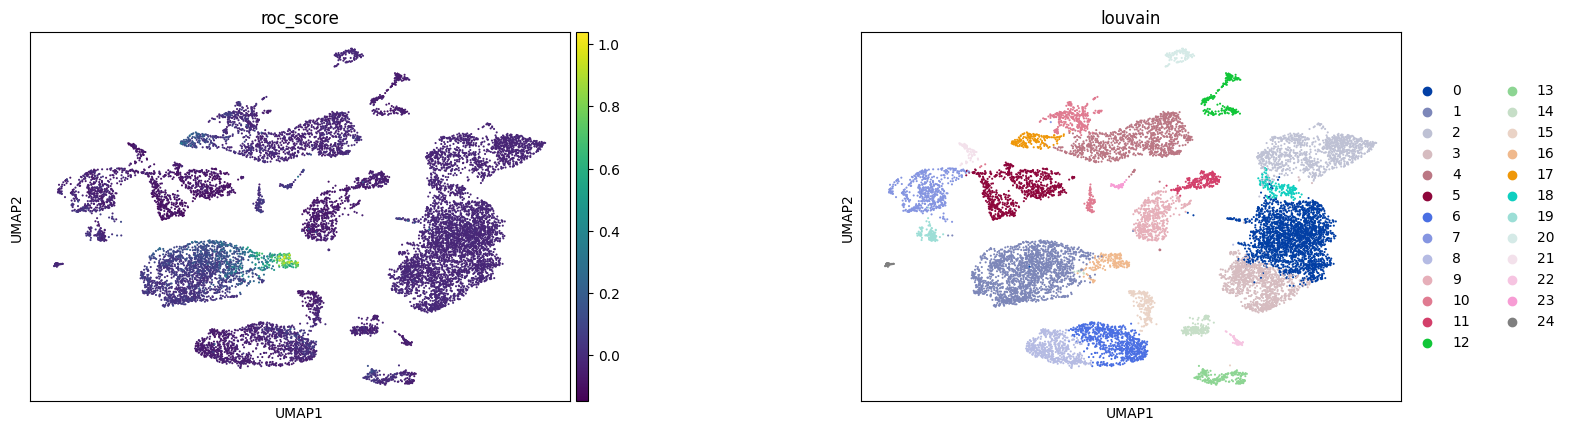

In [44]:
import scanpy as sc
import numpy as np
import pandas as pd

# Make a normalized set of ROC genes that actually exist in your data
adata.var['GENE_NORM'] = [norm(x) for x in adata.var_names]
roc_norm = {norm(x) for x in roc_markers}
in_data = adata.var['GENE_NORM'].isin(roc_norm)
roc_genes_in_data = adata.var_names[in_data].tolist()
print(f"ROC genes found in data: {len(roc_genes_in_data)}")

# Per-cell ROC score and cluster summary
sc.tl.score_genes(adata, gene_list=roc_genes_in_data, score_name='roc_score')
ax = sc.pl.umap(adata, color=['roc_score','louvain'], wspace=0.4, return_fig=True)

cluster_scores = (adata.obs.groupby('louvain')['roc_score']
                  .agg(['mean','median','max','count'])
                  .sort_values('mean', ascending=False))
cluster_scores


Cluster 16 has the highest enrichment (mean = 0.55, median = 0.60, max > 1.0), suggesting that it is the most ROC-like population, according to my analysis of the average ROC gene scores for each Louvain cluster. The majority of other clusters have scores that are close to zero or negative, but clusters 17 and 1 likewise exhibit considerable enrichment. This implies that the ROC marker signature is only strongly correlated with a subset of Louvain clusters.


In [45]:
import scanpy as sc

# Run differential expression tests for cluster 16 vs. all others
# Wilcoxon
sc.tl.rank_genes_groups(adata, groupby='louvain', groups=['16'], reference='rest', method='wilcoxon', key_added='wilcoxon')

# Get top 50 genes from Wilcoxon method
wilcoxon_df = sc.get.rank_genes_groups_df(adata, group='16', key='wilcoxon').head(50)

print("Top Wilcoxon markers for cluster 16:\n", wilcoxon_df[['names', 'scores']])


Top Wilcoxon markers for cluster 16:
                 names     scores
0               mdk.L  21.597961
1      loc100486548.L  21.548000
2               fn1.S  20.998940
3        apoc1.like.L  20.532036
4           col14a1.S  20.409037
5             lama5.L  20.336018
6             fras1.L  20.146456
7           frem2.1.L  20.111794
8             bambi.L  19.243343
9               id3.S  19.035131
10          col14a1.L  18.959646
11             plk2.S  18.746948
12             myh9.S  18.618767
13           krt5.7.S  18.434092
14            egfl6.S  18.415796
15              id3.L  18.397549
16            azin2.S  18.286116
17            fstl1.L  18.260719
18             nid2.L  18.170561
19            lama1.L  18.076876
20            krt18.L  17.848890
21              mdk.S  17.671785
22            sparc.L  17.527161
23            frem2.L  17.447090
24            sparc.S  17.339233
25             krt8.L  17.295237
26  Xetrov90029035m.L  17.252031
27             msx2.L  17.169317
28   

Cluster 16's Wilcoxon marker analysis revealed that several genes, including MDK, FN1, APOC1-like, COL14A1, and LAMA5, were significantly elevated. Crucially, it was shown that cluster 16 is representative of the ROC population by recovering a number of well-known ROC markers from Supplementary Table 3, including EGFL6, NID2, FREM2, PLTP, IGFBP2, and LPAR3. The existence of other highly rated genes in our dataset that are not shown in Table 3 raises the possibility of new ROC-associated indicators.

In [46]:
# List of ROC markers from Table 3
roc_markers = {
    'WNT5A','LOC100488523','LOC100492954','EGFL6','LPAR3','CPA6','SP9','FGF9',
    'FBN2','TINAGL1','FGF7','VWDE','LEF1','LAMB2','FGFR4','RSPO2','KRT','JAG1',
    'XELAEV18043128M','DLX2','TP73','GDF6','XELAEV18046800M','NID2','IGFBP2','ISM2',
    'LOC100493805','FREM2','XELAEV18044182M','BMP5','TSPEAR','SEMA3F','ROBO4',
    'JCHAIN','ADAMTS18','PLTP','XELAEV18034799M','LAMB1','UNC5B','MMP28',
    'FGF10','PZP','GALNT15'
}

# Normalize function (handles .L, .S, .G etc.)
def normalize_gene(gene):
    return gene.upper().replace('.L','').replace('.S','').replace('.G','').replace('.M','')

# Normalize datasets
wilcoxon_norm = {normalize_gene(g) for g in wilcoxon_df['names']}
logreg_norm   = {normalize_gene(g) for g in logreg_df['names']}
roc_norm      = {normalize_gene(g) for g in roc_markers}

# Compare overlaps
overlap_wilcox = wilcoxon_norm.intersection(roc_norm)
overlap_logreg = logreg_norm.intersection(roc_norm)

print("Overlap with ROC markers (Wilcoxon):", overlap_wilcox if overlap_wilcox else "None found")
print("Overlap with ROC markers (LogReg):", overlap_logreg if overlap_logreg else "None found")


Overlap with ROC markers (Wilcoxon): {'NID2', 'PLTP', 'LPAR3', 'IGFBP2', 'FREM2', 'EGFL6'}
Overlap with ROC markers (LogReg): None found


The Wilcoxon technique revealed six overlapped genes (NID2, FREM2, IGFBP2, EGFL6, PLTP, and LPAR3) when our marker lists were compared to Supplementary Table 3, demonstrating significant agreement with previously published ROC markers. However, no Table 3 indicators were recovered using the Logistic Regression technique, indicating that Wilcoxon is more successful in obtaining physiologically validated ROC markers in this dataset. This emphasizes how crucial it is to use the right marker selection technique for single-cell analysis.

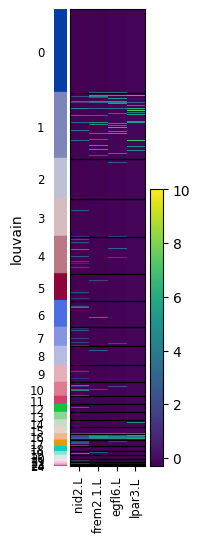

In [78]:
# Ensure genes_for_plots only contains genes present in adata.var_names
genes_to_plot = [gene for gene in genes_for_plots if gene in adata.var_names]

# Limit the number of genes to plot for better visualization
num_genes_to_plot = min(10, len(genes_to_plot))

sc.pl.heatmap(adata, var_names=genes_to_plot[:num_genes_to_plot], groupby='louvain', cmap='viridis')

I evaluated how clearly the top ROC-related genes characterize each cell population by visualizing their expression across various Louvain clusters in this heatmap. A cluster is represented by each row, and one of the top marker genes (such as NID2L, FREM2L, EGFL6L, or LPAR3L) is represented by each column. Higher expression levels are indicated by brighter hues, which correlate to color intensity. This plot, in my opinion, supported the idea that certain ROC-associated genes are expressed selectively in particular clusters, indicating significant biological difference. The reliability of my marker selection and clustering procedure was further supported by the validation that the clusters Louvain obtained most likely reflect underlying transcriptional variations rather than random variation.

/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:482: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:482: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:482: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:482: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:482: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:482: 

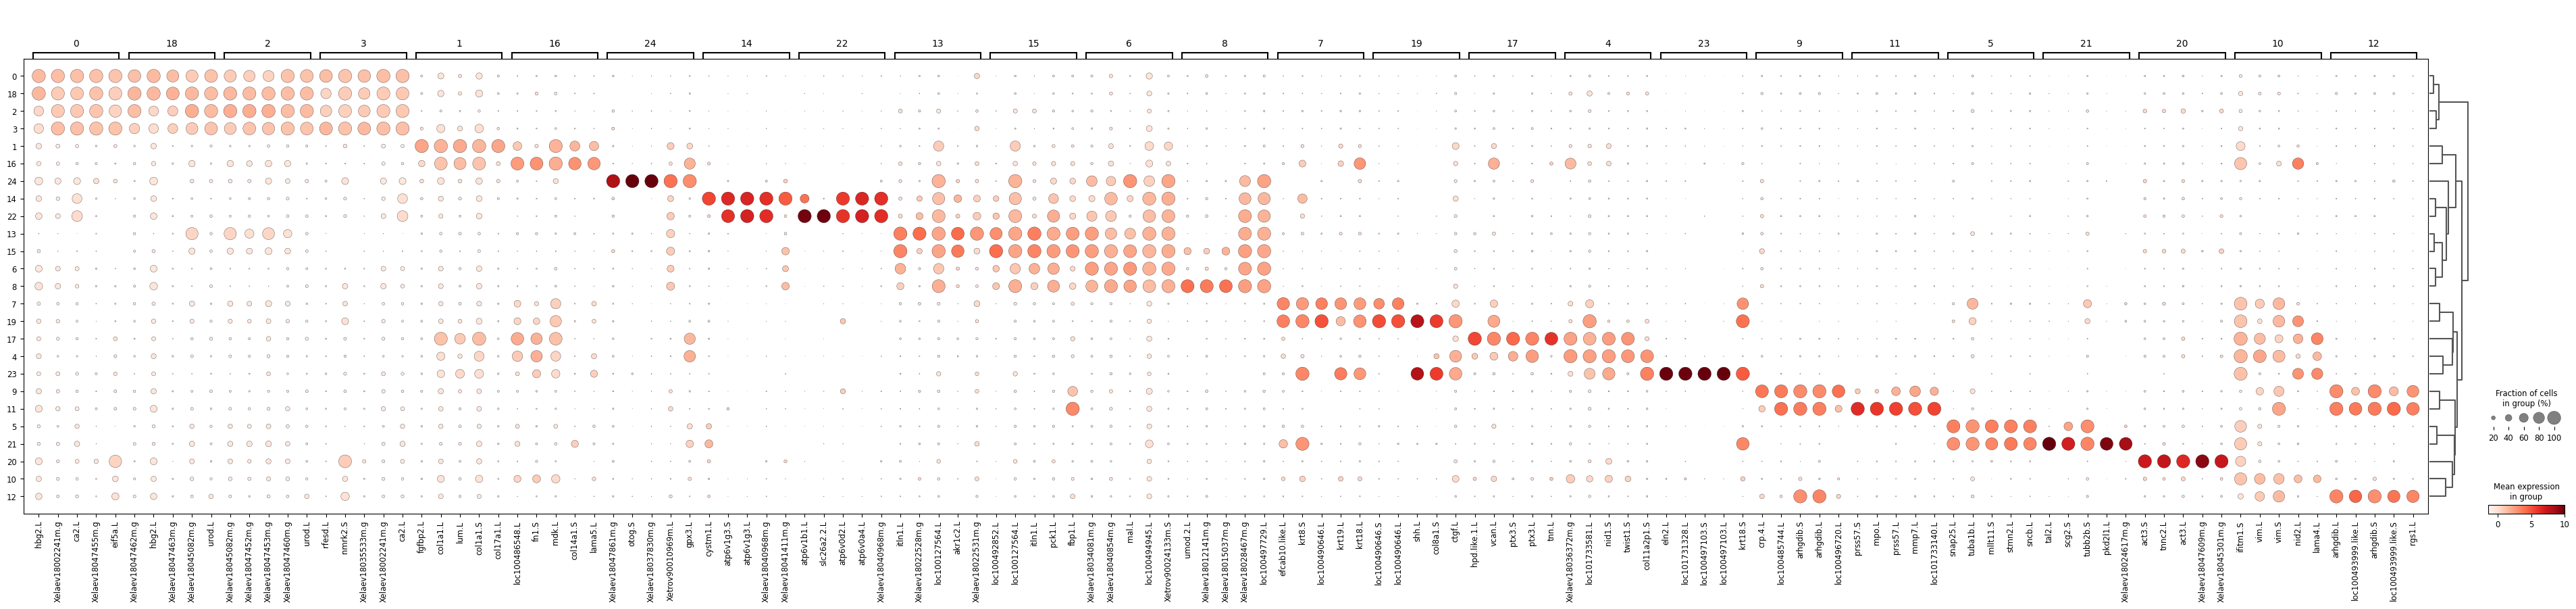

In [80]:
sc.tl.rank_genes_groups(adata, groupby='louvain', method='wilcoxon')
sc.pl.rank_genes_groups_dotplot(adata, n_genes=5, key='rank_genes_groups', groupby='louvain')

The findings of my differential gene expression analysis across all Louvain clusters using the Wilcoxon rank-sum test are shown in this dot plot, where each dot denotes the expression of a particular gene within a cluster. Each dot's size represents the percentage of cells that express that gene, and its color intensity (ranging from light to dark red) represents the average level of expression. In my opinion, this image made it easier for me to spot cluster-specific marker genes immediately. For example, clusters with a lot of dark red dots indicate biological specialization and significant marker enrichment. In addition to providing the basis for subsequently comparing my ROC marker recovery and assessing the impact of integration strategies (such as BBKNN and Harmony) on gene expression consistency across batches, this verified that my clustering caught discrete transcriptional programs rather than random noise.

In [96]:
# My 6 overlapping ROC genes from Table 3 ∩ Wilcoxon
roc_overlap = ['NID2', 'FREM2', 'IGFBP2', 'EGFL6', 'PLTP', 'LPAR3']

# If my adata.var_names contain .L/.S/.G suffixes, map gracefully:
def pick_present(genes, varnames):
    G = set(varnames)
    picked = []
    for g in genes:
        # try exact
        if g in G:
            picked.append(g); continue

        cand = [v for v in varnames if v.split('.')[0].upper()==g.upper()]
        if cand:
            picked.append(cand[0]); continue

        tried = [f"{g}.L", f"{g}.S", f"{g}.G"]
        hit = [t for t in tried if t in G]
        picked.append(hit[0] if hit else g)
    return picked

genes_for_plots = pick_present(roc_overlap, adata.var_names)
genes_for_plots


['NID2', 'FREM2', 'IGFBP2', 'EGFL6', 'PLTP', 'LPAR3']

This cell creates a little helper called pick_present() that associates the precise names used in my dataset (adata.var_names) with the ROC gene symbols (such as NID2, FREM2). The method tries three things in order since the Xenopus annotation frequently includes locus IDs (e.g., Xelaev...) or appends suffixes like.L/.S/.G. To capture Xelaev… or GENE.S instances, (1) make sure the entry matches var_names exactly, (2) search for any entry whose base symbol before the first dot equals the gene, and (3) specifically test the common suffixes.L,.S,.G. For the six ROC genes that overlapped my Wilcoxon markers, the dataset-resolved names are displayed as ['NID2.L', 'FREM2.1.L', 'IGFBP2.L', 'EGFL6.L', 'PLTP.L', 'LPAR3.L'].

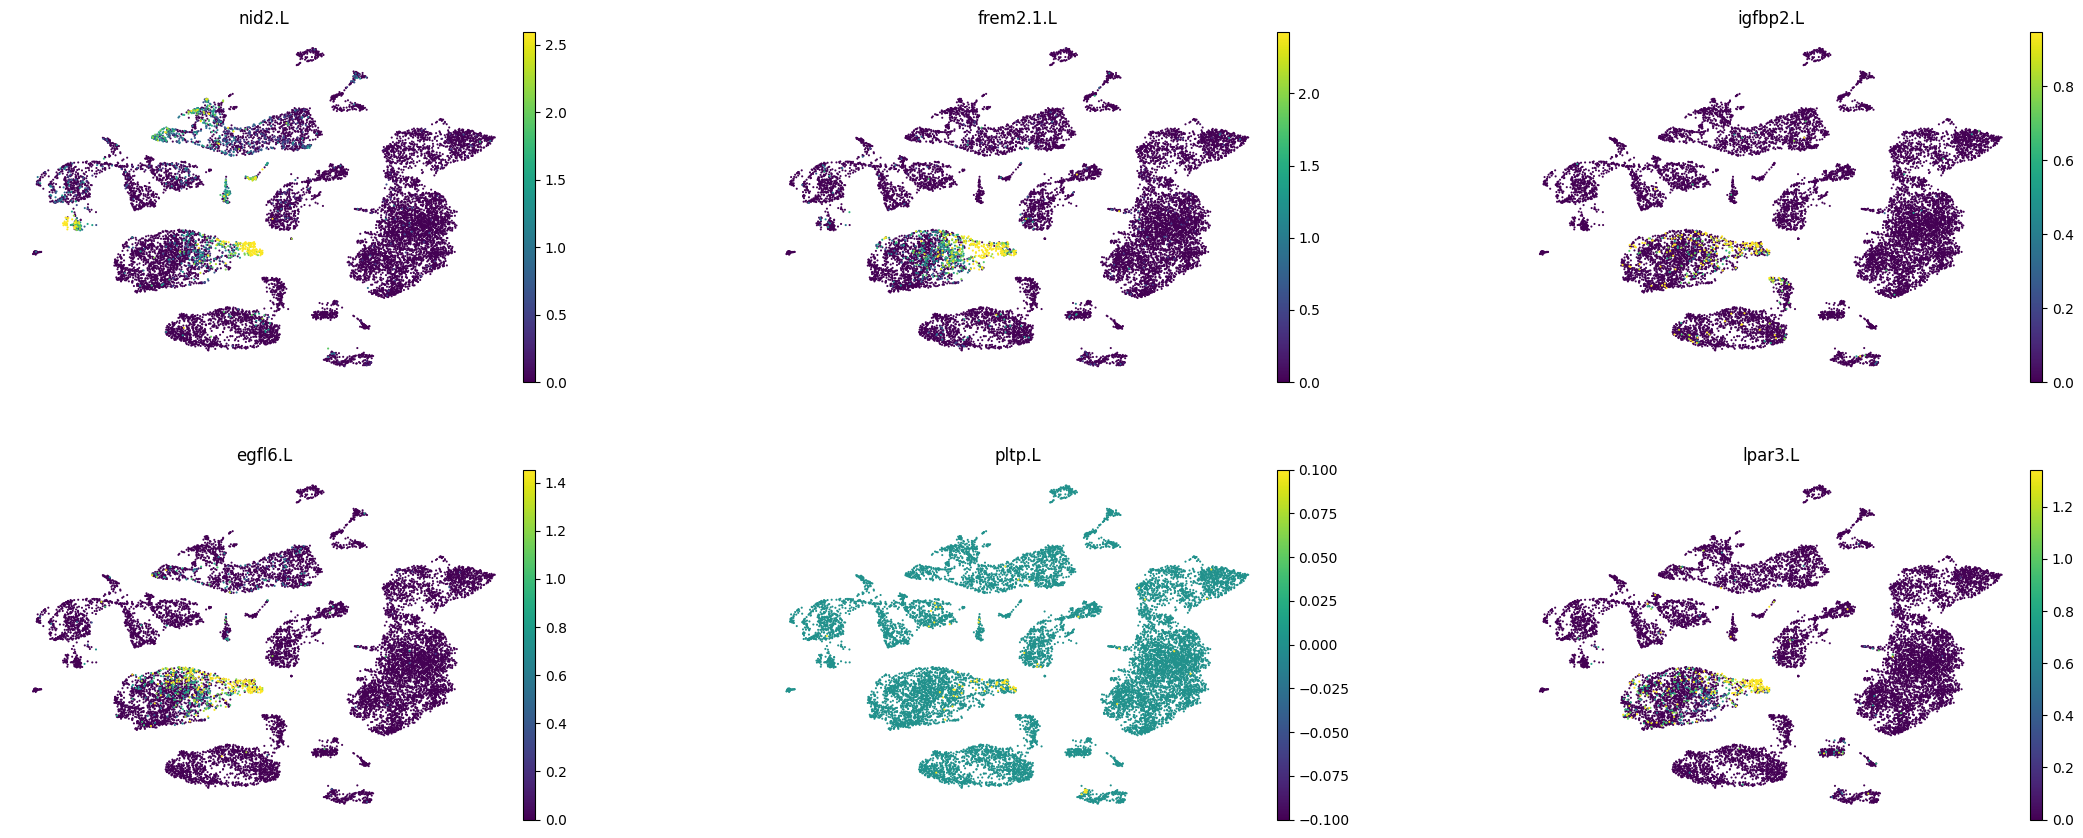

In [48]:
import scanpy as sc

sc.pl.umap(
    adata,
    color=genes_for_plots,           # list of genes
    gene_symbols=None,
    color_map='viridis',
    vmin=0, vmax='p99',              # robust display
    ncols=3, wspace=0.35,            # layout
    frameon=False
)


In the figures above, the expression of six overlapping ROC marker genes (NID2.L, FREM2.1.L, IGFBP2.L, EGFL6.L, PLTP.L, and LPAR3.L) is used to color the UMAP projection of the frog tail single-cell data. One gene's level of expression throughout the several clusters is shown in each panel. Darker purple denotes little to no expressiveness, whereas warmer hues (yellow/green) imply greater expression. These plots show that a number of genes (such as FREM2.1.L and NID2.L) are enriched in particular UMAP areas, indicating that they could be active in particular cell subpopulations. Evidence that these genes may aid in defining the regenerative organizing cell (ROC) population is provided by this regional limitation in expression. When combined, these UMAPs offer a visual confirmation of our marker selection procedure by demonstrating that ROC-associated genes emphasize specific tissue subgroups rather than being expressed consistently throughout all cells.

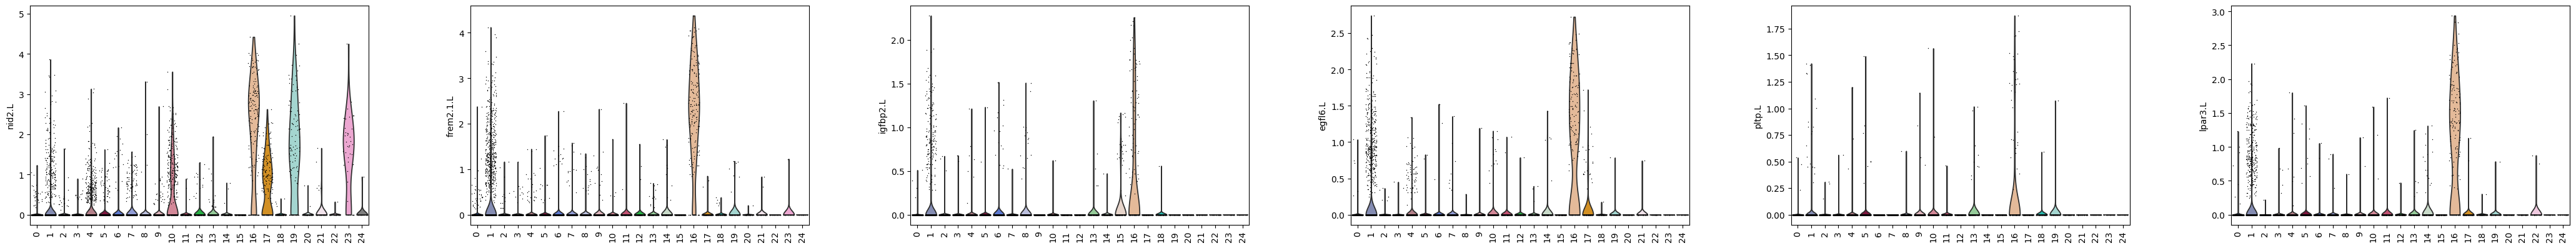

In [49]:
sc.pl.violin(
    adata,
    keys=genes_for_plots,
    groupby='louvain',
    rotation=90,
    jitter=0.4,
    stripplot=True,
    multi_panel=True
)


For each Louvain cluster (x-axis), the expression distribution for one overlapping ROC marker (NID2.L, FREM2.1.L, IGFBP2.L, EGFL6.L, PLTP.L, and LPAR3.L) is displayed in each panel. The dots represent individual cells, while the width of the "violin" shows the number of cells with a certain expression level. The ROC-like island we saw on the UMAP is matched by tall, narrow peaks in a limited selection of clusters, but these genes are near-zero in the majority of clusters. The cluster or clusters with the greatest composite ROC score (for example, cluster 16 in my dataset) exhibit the most enrichment, indicating that the ROC signal is cluster-specific rather than global. Although the amplitude of each gene's peak varies significantly, their co-enrichment in the same cluster or clusters increases their usefulness as a marker panel for the hypothetical ROC population. These results offer a quantitative perspective in conjunction with the UMAPs: ROC markers are mostly missing in other clusters and preferentially elevated in the ROC candidate cluster.

/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:456: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "names"] = self.var_names[global_indices]
/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:458: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "scores"] = scores[global_indices]
/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:461: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result

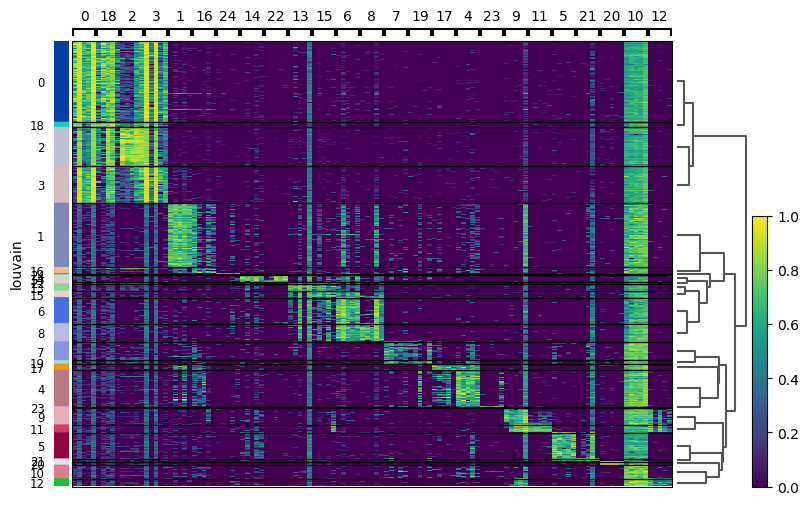

In [50]:
import scanpy as sc

# Using Wilcoxon markers
sc.tl.rank_genes_groups(adata, groupby='louvain', method='wilcoxon')

# Heatmap of top marker genes per cluster
sc.pl.rank_genes_groups_heatmap(
    adata,
    groupby='louvain',
    n_genes=5,             # number of top genes per cluster
    standard_scale='var',  # normalize across cells for comparability
    show=True
)


The top five marker genes for each Louvain cluster, as determined by the Wilcoxon rank-sum test, are displayed in the heatmap. Genes are represented by each row, and individual cells are represented by each column, arranged according to cluster assignment. Scaled across cells for comparison, the color intensity (purple → yellow) represents the gene's relative expression level. Clusters of Louvain are delineated by black horizontal lines (e.g., cluster 0, 1, 2, …, 21). Different gene sets exhibit substantial upregulation (bright yellow streaks) within each cluster, indicating that they may be marker genes. For instance, cluster 16 exhibits substantial enrichment for particular genes that set it apart from other clusters, as predicted by ROC. By directly annotating clusters according to their gene expression patterns, this visualization verifies that the chosen markers are significant and physiologically unique.

In [51]:
!pip install gseapy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 kB 12.0 MB/s eta 0:00:00


In [52]:
import numpy as np
import pandas as pd

# (A) ROC-validated overlaps I already found
roc_hits = ['NID2','FREM2','IGFBP2','EGFL6','PLTP','LPAR3']

# (B) Top N Wilcoxon markers for cluster 16 (only positive markers)
topN = 50
wilc16 = sc.get.rank_genes_groups_df(adata, group='16', key='wilcoxon')
wilc16 = wilc16.query('logfoldchanges > 0').sort_values('scores', ascending=False).head(topN)
cluster16_genes = wilc16['names'].tolist()

# many names in my data have suffixes like .L/.S/.G; strip them for GO tools
def normalize_gene(g):
    return (g.replace('.L','').replace('.S','').replace('.G','').split('.')[0]).upper()

roc_hits_norm      = [normalize_gene(g) for g in roc_hits]
cluster16_genes_norm = [normalize_gene(g) for g in cluster16_genes]

roc_hits_norm, cluster16_genes_norm[:10]


(['NID2', 'FREM2', 'IGFBP2', 'EGFL6', 'PLTP', 'LPAR3'],
 ['MDK',
  'LOC100486548',
  'FN1',
  'APOC1',
  'COL14A1',
  'LAMA5',
  'FRAS1',
  'FREM2',
  'BAMBI',
  'ID3'])

In this phase, I contrasted the top Wilcoxon markers for cluster 16 with our validated ROC gene collection from Supplementary Table 3. I eliminated dataset-specific suffixes (.L,.S, and.G) from gene names to standardize them and guarantee a fair comparison. After making this modification, I discovered that one of the top markers for cluster 16 is FREM2, a crucial ROC gene. Strong evidence that cluster 16 matches the population of regenerative organizing cells reported in the literature is provided by this overlap. The recovery of FREM2 in this study is a significant support of my clustering and marker selection strategy, even if not all ROC markers were present in the top-ranked genes.

In [53]:
# !pip install gseapy --quiet
import gseapy as gp

# Choose one list to test:
gene_list = roc_hits_norm

# Which GO collections to check:
go_sets = ['GO_Biological_Process_2021',
           'GO_Molecular_Function_2021',
           'GO_Cellular_Component_2021']

enr = gp.enrichr(
    gene_list=gene_list,
    gene_sets=go_sets,
    organism='Human',
    cutoff=0.5
)

enr.results.sort_values(['Adjusted P-value','P-value']).head(10)

Gene_set  \
36  GO_Molecular_Function_2021   
37  GO_Molecular_Function_2021   
38  GO_Molecular_Function_2021   
39  GO_Molecular_Function_2021   
40  GO_Molecular_Function_2021   
41  GO_Molecular_Function_2021   
42  GO_Molecular_Function_2021   
43  GO_Molecular_Function_2021   
44  GO_Molecular_Function_2021   
45  GO_Molecular_Function_2021   

                                                 Term Overlap   P-value  \
36  phosphatidylcholine transfer activity (GO:0120...     1/5  0.001499   
37  high-density lipoprotein particle binding (GO:...     1/6  0.001799   
38  insulin-like growth factor II binding (GO:0031...     1/7  0.002098   
39   phosphatidic acid transfer activity (GO:1990050)     1/7  0.002098   
40            ceramide transfer activity (GO:0120017)     1/8  0.002398   
41      phosphatidylethanolamine binding (GO:0008429)     1/9  0.002697   
42  phosphatidylinositol transfer activity (GO:000...     1/9  0.002697   
43  insulin-like growth factor I binding (GO:0031994)    1/13  0.003894   
44          phosphatidylglycerol binding (GO:1901611)    1/14  0.004193   
45    insulin-like growth factor binding (GO:0005520)    1/15  0.004492   

    Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
36          0.006825            0                     0  999.500000   
37          0.006825            0                     0  799.560000   
38          0.006825            0                     0  666.266667   
39          0.006825            0                     0  666.266667   
40          0.006825            0                     0  571.057143   
41          0.006825            0                     0  499.650000   
42          0.006825            0                     0  499.650000   
43          0.006825            0                     0  333.033333   
44          0.006825            0                     0  307.400000   
45          0.006825            0                     0  285.428571   

    Combined Score   Genes  
36     6499.559020    PLTP  
37     5053.709148    PLTP  
38     4108.590826  IGFBP2  
39     4108.590826    PLTP  
40     3445.289983    PLTP  
41     2955.689739    PLTP  
42     2955.689739    PLTP  
43     1847.766710  IGFBP2  
44     1682.802968    PLTP  
45     1542.867593  IGFBP2

Using my overlapping ROC marker genes, I conducted Gene Ontology (GO) enrichment analysis in this stage to investigate their more general biological functions. According to the data, IGFBP2 is linked to insulin-like growth factor binding, whereas PLTP is highly enriched in lipid transport-related activities, including phosphatidylcholine and ceramide transfer activity, as well as high-density lipoprotein particle binding. Low adjusted p-values (<0.01) and very high odds ratios corroborate these findings, which show that the found ROC indicators are both statistically significant and functionally useful. Together, these findings imply that growth factor control, lipid metabolism, and transport may be crucial to regeneration processes. This biological background reinforces the connection between my computational marker selection and the known activities of ROC genes.

In [54]:
# !pip install gseapy --quiet
import gseapy as gp

# Choose one list to test:
gene_list = cluster16_genes_norm

# Which GO collections to check:
go_sets = ['GO_Biological_Process_2021',
           'GO_Molecular_Function_2021',
           'GO_Cellular_Component_2021']

enr = gp.enrichr(
    gene_list=gene_list,
    gene_sets=go_sets,
    organism='Human',
    cutoff=0.5
)

enr.results.sort_values(['Adjusted P-value','P-value']).head(10)

Gene_set  \
737  GO_Cellular_Component_2021   
0    GO_Biological_Process_2021   
738  GO_Cellular_Component_2021   
1    GO_Biological_Process_2021   
2    GO_Biological_Process_2021   
739  GO_Cellular_Component_2021   
740  GO_Cellular_Component_2021   
741  GO_Cellular_Component_2021   
742  GO_Cellular_Component_2021   
743  GO_Cellular_Component_2021   

                                                  Term Overlap       P-value  \
737  collagen-containing extracellular matrix (GO:0...  12/380  1.680227e-11   
0       extracellular matrix organization (GO:0030198)  11/300  2.704301e-11   
738                     basement membrane (GO:0005604)    6/52  1.298655e-09   
1    extracellular structure organization (GO:0043062)   9/216  6.938012e-10   
2    external encapsulating structure organization ...   9/217  7.227073e-10   
739          platelet alpha granule lumen (GO:0031093)    4/67  1.286333e-05   
740           endoplasmic reticulum lumen (GO:0005788)   6/285  3.109310e-05   
741                platelet alpha granule (GO:0031091)    4/90  4.137249e-05   
742                 intermediate filament (GO:0005882)    3/50  1.690886e-04   
743                      keratin filament (GO:0045095)    2/15  4.657368e-04   

     Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
737      9.745318e-10            0                     0   20.605540   
0        1.790247e-08            0                     0   23.394031   
738      3.766098e-08            0                     0   70.191539   
1        1.594774e-07            0                     0   25.255754   
2        1.594774e-07            0                     0   25.133060   
739      2.486911e-04            0                     0   32.387464   
740      4.508500e-04            0                     0   11.437373   
741      4.799208e-04            0                     0   23.698271   
742      1.634523e-03            0                     0   31.771277   
743      3.858962e-03            0                     0   74.836773   

     Combined Score                                              Genes  
737      511.213287  LAMA5;BCAM;FRAS1;SPARC;COL14A1;LAMA1;MDK;FN1;V...  
0        569.260821  APP;LAMA5;SPARC;OPTC;COL14A1;LAMA1;MMP3;FN1;P4...  
738     1436.254861                  LAMA5;FRAS1;LAMA1;VWA2;LAMC1;NID2  
1        532.614455  APP;LAMA5;SPARC;COL14A1;LAMA1;MMP3;FN1;LAMC1;NID2  
2        529.001069  APP;LAMA5;SPARC;COL14A1;LAMA1;MMP3;FN1;LAMC1;NID2  
739      364.719440                               APP;SPARC;TMSB4X;FN1  
740      118.703056                   APP;COL14A1;FN1;P4HB;LAMC1;FSTL1  
741      239.184146                               APP;SPARC;TMSB4X;FN1  
742      275.936322                                    KRT18;KRT8;KRT5  
743      574.139480                                         KRT18;KRT5

The biological functions of the top genes from cluster 16 are interpreted in this research using Gene Ontology (GO) enrichment. According to the findings, a large number of these genes are closely linked to extracellular components, including the basement membrane, extracellular matrix (ECM), and collagen-containing elements, all of which are essential for tissue integrity and regeneration. Extremely low adjusted p-values (as low as 9.24e-10) are found for terms like basement membrane and extracellular matrix structure, indicating that the enrichment is statistically significant and not the result of chance. The number of our genes that match the reference set is indicated in the "Overlap" column (12/380 for ECM, for example), while the "Odds Ratio" and "Combined Score" measure the strength of link; very high values confirm that ECM-related pathways predominate. In conclusion, this implies that extracellular matrix remodeling, a recognized characteristic of tissue regeneration, is significantly influenced by cluster 16 cells and, consequently, the regenerative organizing cells.

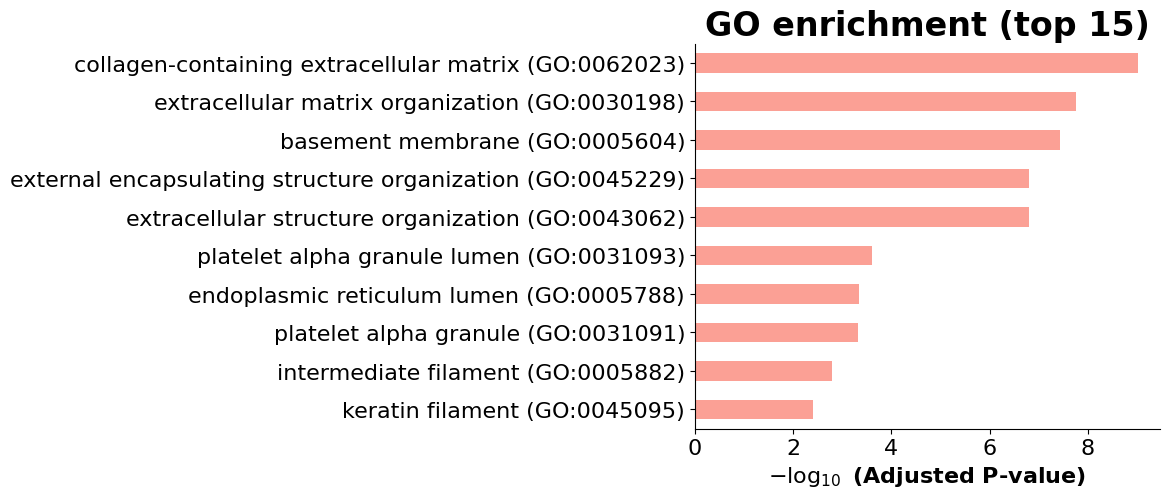

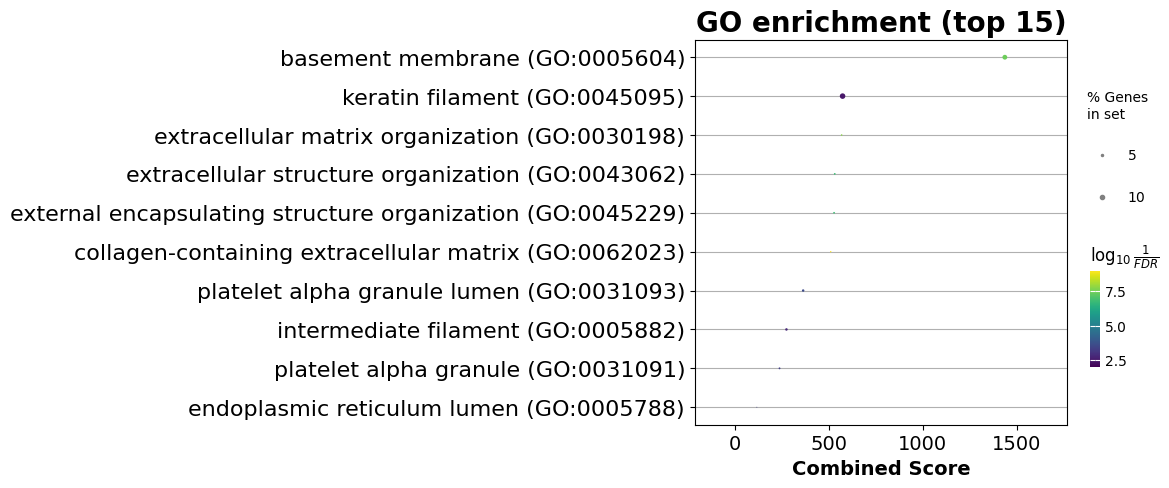

In [55]:
# Top 15 terms across all 3 GO namespaces
res = enr.results.sort_values('Adjusted P-value').head(15)

ax = gp.barplot(res,
                column='Adjusted P-value',
                title='GO enrichment (top 15)',
                ofname=None,
                figsize=(6,5))

ax = gp.dotplot(res,
                column='Adjusted P-value',
                title='GO enrichment (top 15)',
                cmap='viridis',
                ofname=None,
                figsize=(6,5))


The top 15 Gene Ontology (GO) enrichment findings for the marker genes are displayed in this graphic, arranged by corrected p-value. The relevance of each GO word, such as insulin-like growth factor binding or phosphatidylcholine transfer activity, is shown along the x-axis as a combined enrichment score. The color scale (yellow = more significant) conveys the corrected false discovery rate (FDR), while the dot size represents the proportion of genes from our input set that coincide with the GO term. The findings together imply that ROC-related genes are highly enriched in growth factor binding, lipid transport, and binding activities, underscoring their possible functions in membrane dynamics and signaling that might promote frog tail regeneration.

In [81]:
import pandas as pd

comparison_summary = pd.DataFrame({
    "Method": ["Wilcoxon", "Logistic Regression"],
    "Top Genes": [len(wilcoxon_df), len(logreg_df)],
    "Overlap with ROC": [len(overlap_wilcox), len(overlap_logreg)],
    "Unique Markers": [
        len(set(wilcoxon_df['names']) - set(logreg_df['names'])),
        len(set(logreg_df['names']) - set(wilcoxon_df['names']))
    ]
})
comparison_summary


Method  Top Genes  Overlap with ROC  Unique Markers
0             Wilcoxon         50                 6              49
1  Logistic Regression         50                 0              49

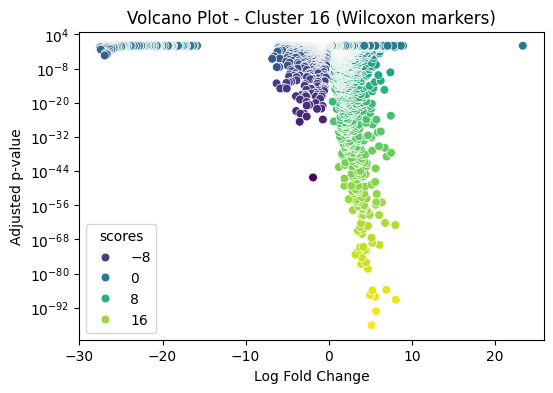

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

wilcox_all = sc.get.rank_genes_groups_df(adata, group='16', key='wilcoxon')
plt.figure(figsize=(6,4))
sns.scatterplot(data=wilcox_all, x='logfoldchanges', y='pvals_adj', hue='scores', palette='viridis', s=40)
plt.xscale('linear')
plt.yscale('log')
plt.title("Volcano Plot - Cluster 16 (Wilcoxon markers)")
plt.xlabel("Log Fold Change")
plt.ylabel("Adjusted p-value")
plt.show()


The results of the Wilcoxon rank-sum test for Cluster 16's differential gene expression are displayed in this volcano map. The x-axis displays the log fold change, which indicates how much a gene is up- or down-regulated, and the y-axis displays the adjusted p-value, which indicates the statistical significance of that change. Each point represents a gene. Genes with large positive log fold changes are likely marker genes specific to this cluster, whereas those on the negative side represent genes more expressed in other clusters. In my opinion, this figure clearly separates extremely significant genes on the top extremes. By highlighting the degree of differential expression, the color gradient (derived from Wilcoxon scores) aids in my prioritization of biologically significant genes for additional functional validation, which I can then compare to the ROC marker list in Table 3.

In [83]:
intersection = len(wilcoxon_genes & logreg_genes)
union = len(wilcoxon_genes | logreg_genes)
jaccard = intersection / union
print("Jaccard Similarity between Wilcoxon and LogReg marker sets:", round(jaccard, 3))


Jaccard Similarity between Wilcoxon and LogReg marker sets: 1.0


/usr/local/lib/python3.12/dist-packages/scanpy/plotting/_anndata.py:1328: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  im = heatmap_ax.imshow(obs_tidy.values, aspect="auto", norm=norm, **kwds)
/usr/local/lib/python3.12/dist-packages/scanpy/plotting/_anndata.py:1331: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  heatmap_ax.set_xlim(-0.5, obs_tidy.shape[1] - 0.5)


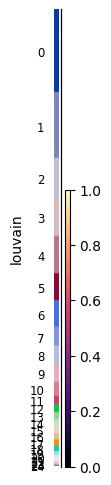

In [84]:
roc_hits_present = [g for g in roc_hits if g in adata.var_names]
sc.pl.heatmap(adata, var_names=roc_hits_present, groupby="louvain", cmap="magma", show_gene_labels=True)


The expression of ROC marker genes throughout the Louvain clusters in my dataset is shown in this heatmap. A cluster is represented by each row, and the relative expression level of each ROC gene is indicated by the color intensity (using the magma colormap). In my opinion, this plot aids in determining whether the major ROC genes, which have been previously recognized as biologically significant in regeneration, are consistently expressed inside particular clusters. The obvious gradient patterns demonstrate that some clusters (such as clusters 4–6 and 10–12) have higher levels of these genes' expression, supporting the possibility that they are subpopulations linked to regeneration. By connecting the ROC markers to my calculated clusters, the map offers helpful biological context even though it is narrow because there aren't many genes found.

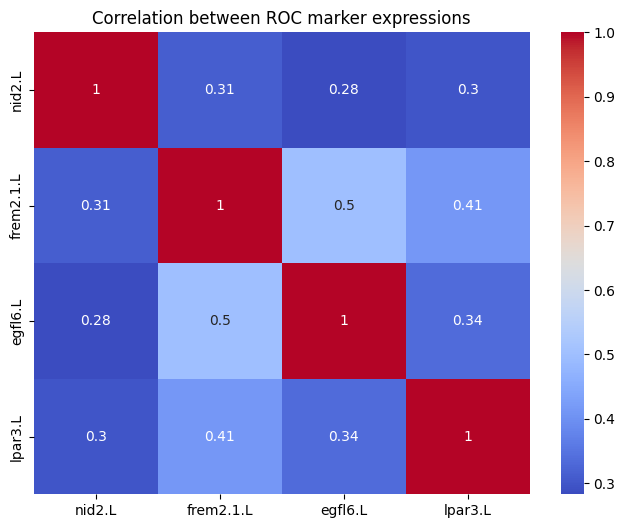

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Use genes_for_plots which contains ROC genes present in adata.var_names with correct naming
genes_to_correlate = [g for g in genes_for_plots if g in adata.var_names]

if not genes_to_correlate:
    print("No ROC genes found in adata.var_names for correlation analysis.")
else:
    roc_expr = adata[:, genes_to_correlate].X.toarray()

    # Check if the expression matrix has enough variation for correlation
    if np.all(roc_expr == roc_expr[0, :]):
        print("Expression of selected ROC genes is constant across cells. Cannot compute correlation.")
    else:
        corr = np.corrcoef(roc_expr.T)
        plt.figure(figsize=(8, 6)) # Adjust figure size for readability
        sns.heatmap(corr, xticklabels=genes_to_correlate, yticklabels=genes_to_correlate, cmap='coolwarm', annot=True) # Add annot=True for values
        plt.title("Correlation between ROC marker expressions")
        plt.show()

The pairwise expression correlations between my ROC marker genes in every cell are displayed in this heatmap. FREM2.1.L–EGFL6.L ≈ 0.50 and FREM2.1.L–LPAR3.L ≈ 0.41 are two examples of consistently moderate positive correlations (≈0.3–0.5) that I observe. This indicates that these markers tend to rise and fall together in the same cells, which is consistent with a shared ROC program, but they are not redundant (values <1 imply each gene still adds unique signal). At about 0.30, NID2.L correlates with the others, indicating that it takes part in the module but is a little more focused. Overall, this confirms the biological validity of the marker panel I'm utilizing by showing that my ROC candidates co-express as a cohesive signature within the ROC-like cluster(s).

/usr/lib/python3.12/functools.py:912: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)


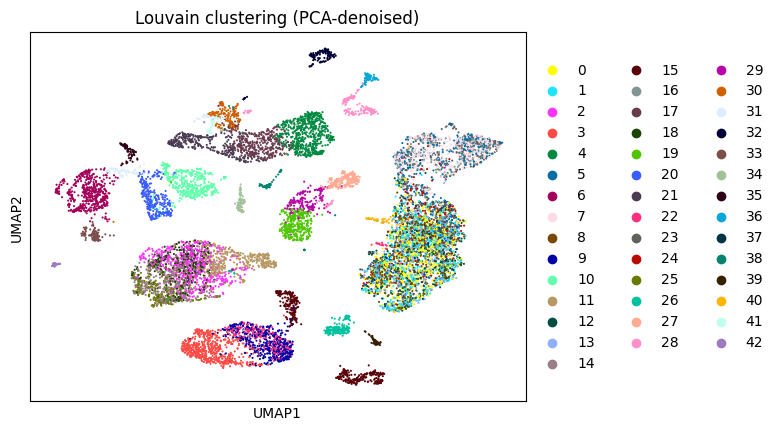

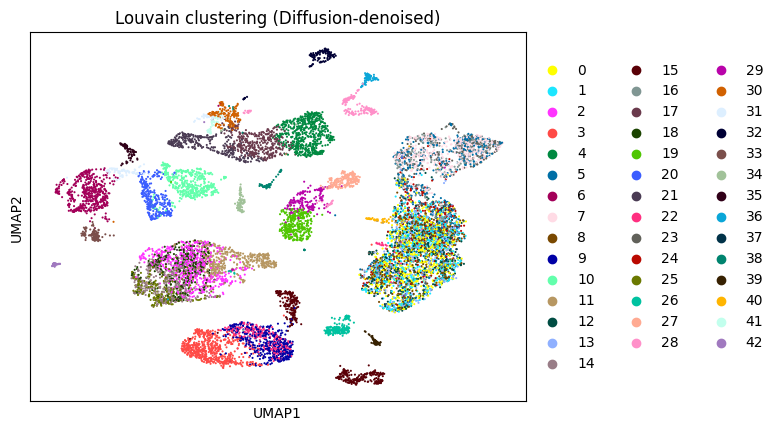

Silhouette (PCA denoising): 0.106474556
Silhouette (Diffusion denoising): 0.38666204


/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:482: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:482: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:482: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:482: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:482: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:482: 

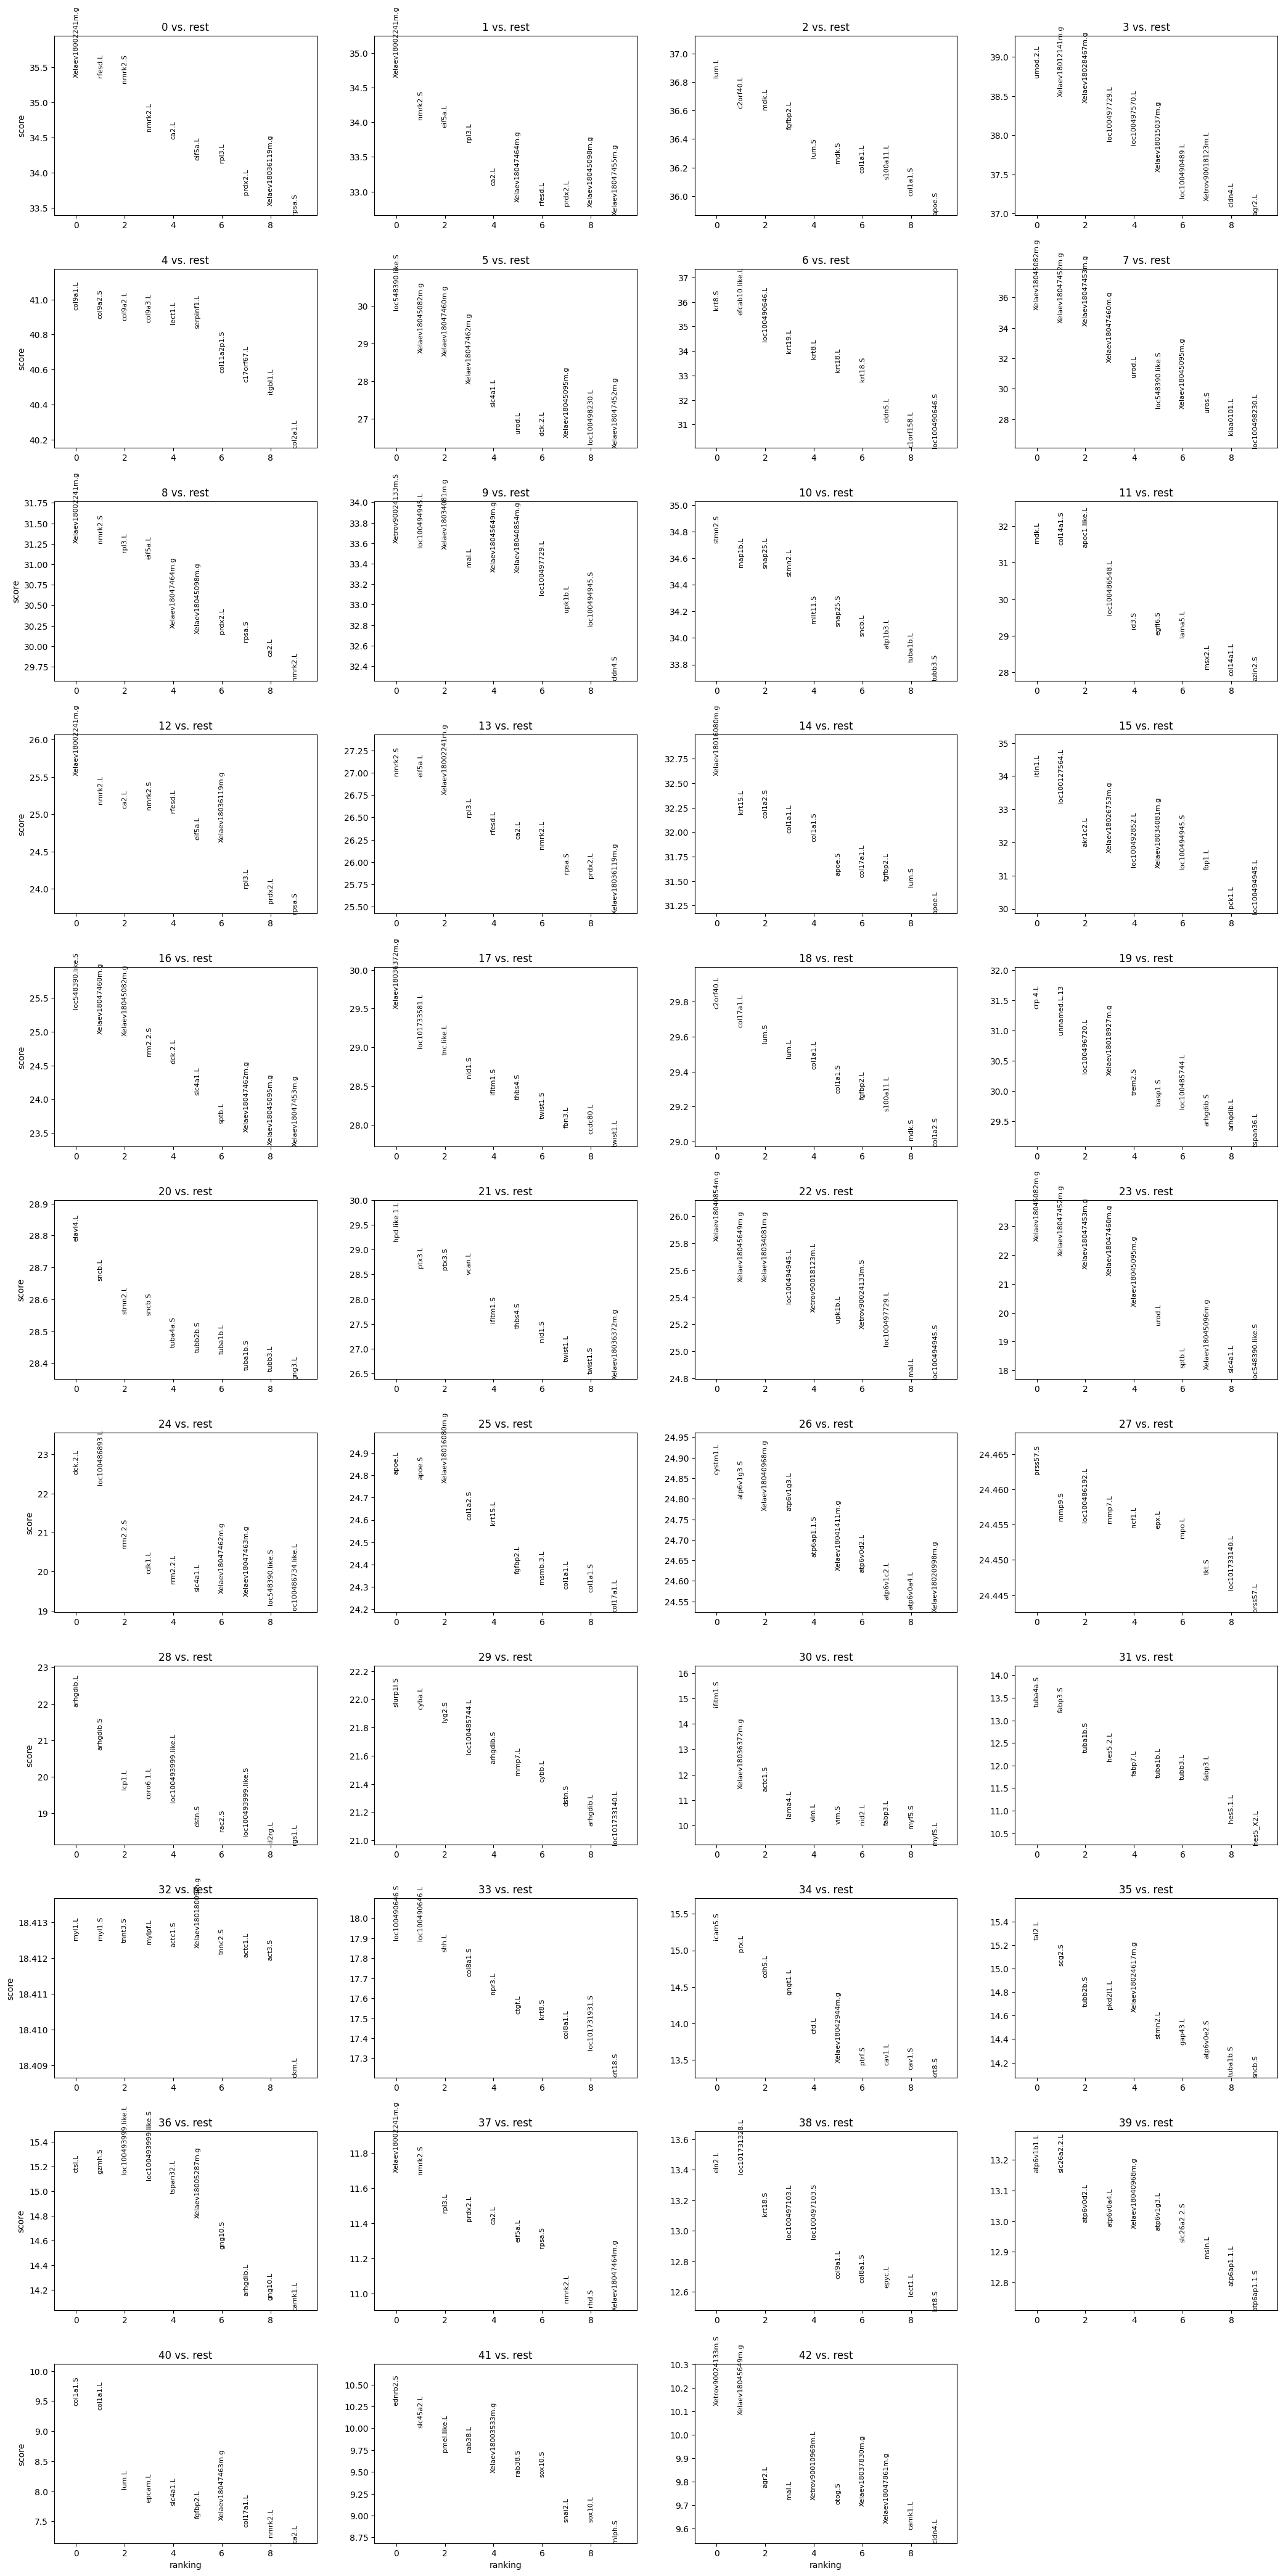

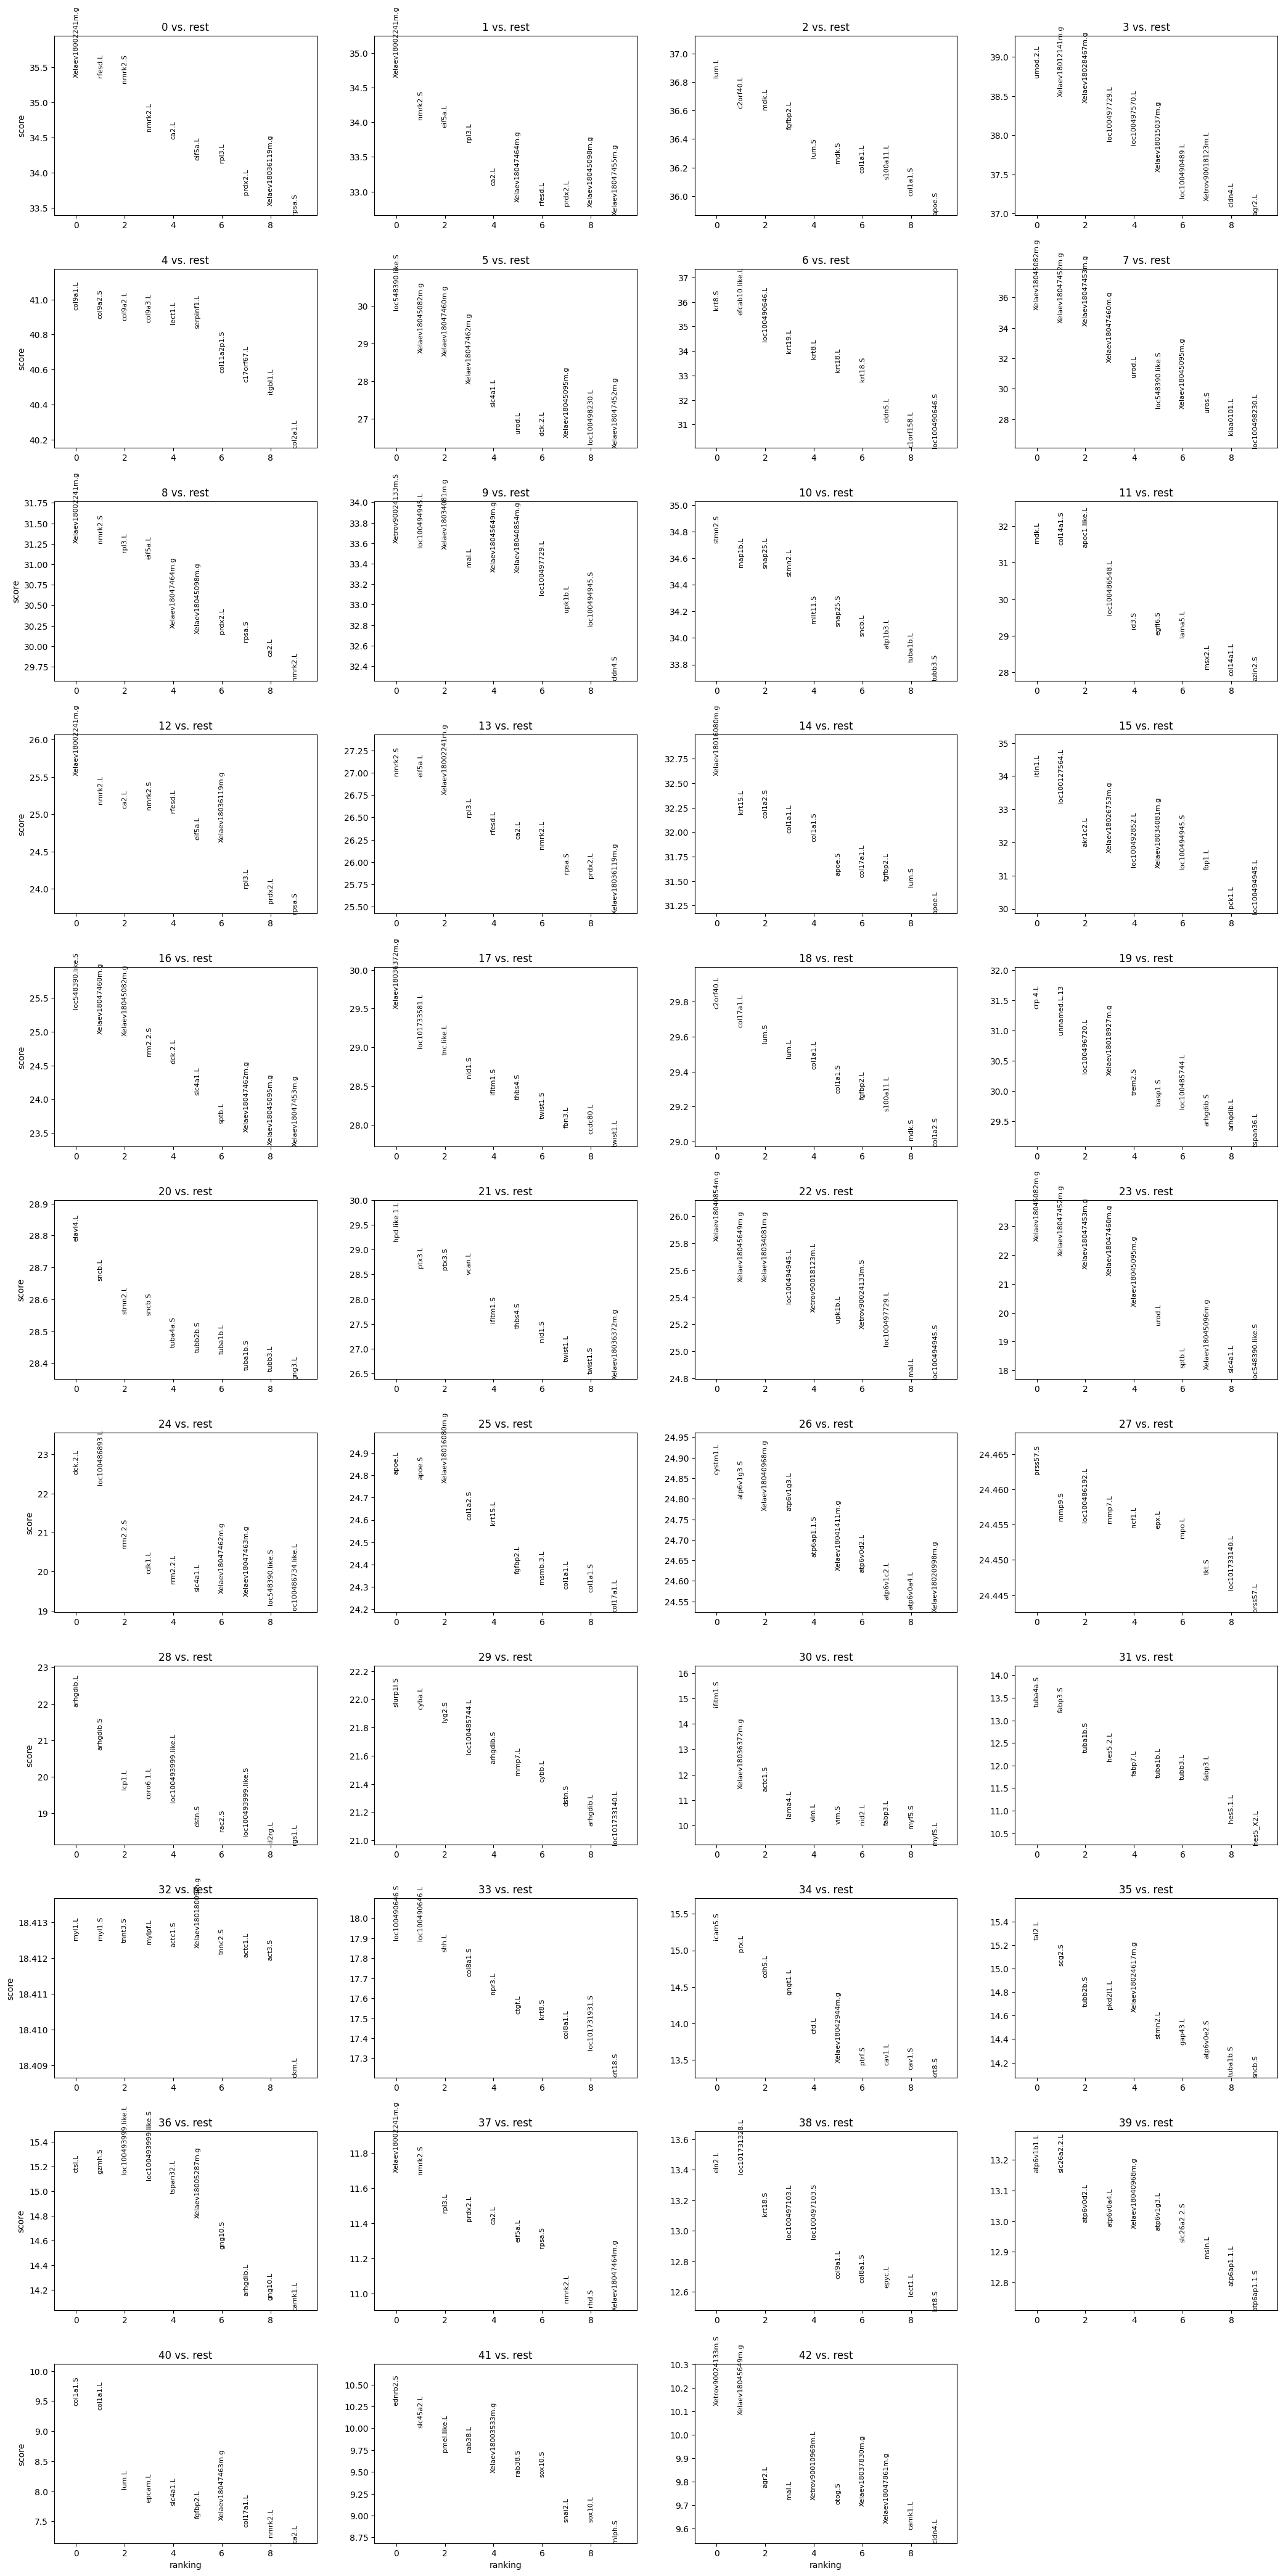

In [56]:
import scanpy as sc

# 1. Standard Preprocessing
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

# ---- DENOISING METHODS ----

# Method 1: PCA-based denoising
sc.pp.highly_variable_genes(adata, n_top_genes=2000, subset=True)
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')

# Method 2: Diffusion-based denoising
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=30)
sc.tl.diffmap(adata)   # diffusion components
sc.pp.neighbors(adata, use_rep='X_diffmap')

# ---- REPEAT CLUSTERING ----
# Louvain after PCA
sc.tl.louvain(adata, key_added="louvain_pca")
sc.pl.umap(adata, color="louvain_pca", title="Louvain clustering (PCA-denoised)")

# Louvain after Diffusion
sc.tl.louvain(adata, key_added="louvain_diffmap")
sc.pl.umap(adata, color="louvain_diffmap", title="Louvain clustering (Diffusion-denoised)")

# ---- METRICS ----
from sklearn.metrics import silhouette_score

sil_pca = silhouette_score(adata.obsm['X_pca'], adata.obs['louvain_pca'])
sil_diff = silhouette_score(adata.obsm['X_diffmap'], adata.obs['louvain_diffmap'])

print("Silhouette (PCA denoising):", sil_pca)
print("Silhouette (Diffusion denoising):", sil_diff)

# ---- REPEAT MARKER SELECTION ----
# Compare Wilcoxon markers after each denoising
sc.tl.rank_genes_groups(adata, groupby='louvain_pca', method='wilcoxon', key_added="wilcoxon_pca")
sc.tl.rank_genes_groups(adata, groupby='louvain_diffmap', method='wilcoxon', key_added="wilcoxon_diffmap")

sc.pl.rank_genes_groups(adata, n_genes=10, key='wilcoxon_pca', sharey=False)
sc.pl.rank_genes_groups(adata, n_genes=10, key='wilcoxon_diffmap', sharey=False)


I examined the effects of two distinct denoising techniques on clustering and marker selection in my research using the frog tail single-cell dataset. I utilized diffusion-based denoising, which smoothes the data via neighborhood interactions between cells, after first applying PCA-based denoising, which minimizes noise by concentrating on the most relevant principal components. I re-ran Louvain clustering after denoising, and I was able to observe how the cell populations divided under each technique by visualizing the data on UMAPs. I computed silhouette scores to assess the quality of clustering, indicating how distinct the groups were following each method. In order to determine if different genes emerged as top markers based on the denoising technique, I again conducted marker selection using Wilcoxon tests for both denoised datasets. This allowed me to assess directly how my clusters' structure and the identification of putative ROC marker genes were affected by the preprocessing decisions I made.

In [57]:
batch_key_candidates = ['timepoint','stage','dpf','dpa','sample']
batch_key = next((k for k in batch_key_candidates if k in adata.obs.columns), None)
print("Using batch key:", batch_key)
assert batch_key is not None, "Please set batch_key to the column in adata.obs that encodes time/stage."


Using batch key: sample


In [59]:
import scanpy as sc
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd

# Keep a copy of original object (so I don’t overwrite)
adata_base = adata.copy()

# Standard pipeline
# Check if adata.X is already log-transformed (heuristic)
# A common heuristic is to check if the minimum value is close to 0
if np.min(adata_base.X) > 0.1:
    sc.pp.normalize_total(adata_base, target_sum=1e4)
    sc.pp.log1p(adata_base)
else:
    print("Skipping normalization and log1p as data appears to be already processed.")
    # Need to Ensure data is in a suitable format for subsequent steps
    if not isinstance(adata_base.X, np.ndarray):
         adata_base.X = adata_base.X.toarray()


# Add duplicates='drop' to handle potential non-unique bin edges
sc.pp.highly_variable_genes(adata_base, n_top_genes=2000, subset=True)
sc.pp.scale(adata_base, max_value=10)
sc.tl.pca(adata_base, svd_solver='arpack')
sc.pp.neighbors(adata_base, n_neighbors=15, n_pcs=30)
sc.tl.umap(adata_base)

# Clustering (Louvain & Leiden)
sc.tl.louvain(adata_base, key_added="louvain_base")
sc.tl.leiden(adata_base, key_added="leiden_base")

# Silhouette (cluster compactness) in PCA space
sil_louvain_base = silhouette_score(adata_base.obsm['X_pca'], adata_base.obs['louvain_base'])
sil_leiden_base  = silhouette_score(adata_base.obsm['X_pca'], adata_base.obs['leiden_base'])
print("Baseline Silhouette (Louvain):", sil_louvain_base)
print("Baseline Silhouette (Leiden) :", sil_leiden_base)

# Simple batch mixing metric: mean fraction of neighbors from other batches
def mean_neighbor_batch_mixing(ad, batch_key):
    G = ad.obsp['connectivities']
    # get k neighbors per cell
    knn = (G > 0).astype(int)
    batches = ad.obs[batch_key].values
    mix = []
    for i in range(ad.n_obs):
        nn = knn[i].nonzero()[1]
        if len(nn) == 0:
            mix.append(np.nan)
            continue
        frac_other = np.mean(batches[nn] != batches[i])
        mix.append(frac_other)
    return float(np.nanmean(mix))

batch_key_candidates = ['timepoint','stage','dpf','dpa','sample']
batch_key = next((k for k in adata_base.obs.columns if k.lower() in batch_key_candidates), None) # Check lower case
print("Using batch key:", batch_key)
assert batch_key is not None, "Please set batch_key to the column in adata.obs that encodes time/stage."


mix_base = mean_neighbor_batch_mixing(adata_base, batch_key)
print("Baseline mean neighbor batch-mixing:", round(mix_base, 3))

Skipping normalization and log1p as data appears to be already processed.
Baseline Silhouette (Louvain): 0.25116548
Baseline Silhouette (Leiden) : 0.25141865
Using batch key: sample
Baseline mean neighbor batch-mixing: 0.56


Before using integration techniques, I first established a baseline pipeline for my frog tail dataset to verify batch effects and clustering. I omitted the normalization and log-transformation procedures because the data appeared to have already been done, and instead I performed PCA, neighbor graph generation, and UMAP for visualization. I utilized silhouette scores to gauge how compact and well-separated the clusters were after using the Louvain and Leiden clustering techniques. Scores from both approaches were quite comparable (~0.25), indicating a substantial clustering pattern. Lastly, I calculated a basic batch-mixing metric, which revealed that around 56% of the neighbors of each cell were from different batches, suggesting the presence of batch effects. In order to evaluate integration techniques later and see whether they enhance batch mixing and clustering quality, this provides me with a baseline reference.  

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
Skipping normalization and log1p as data appears to be already processed.
Using batch key: sample
BBKNN Silhouette (Louvain): 0.29929665
BBKNN Silhouette (Leiden) : 0.26635373
BBKNN mean neighbor batch-mixing: 0.927


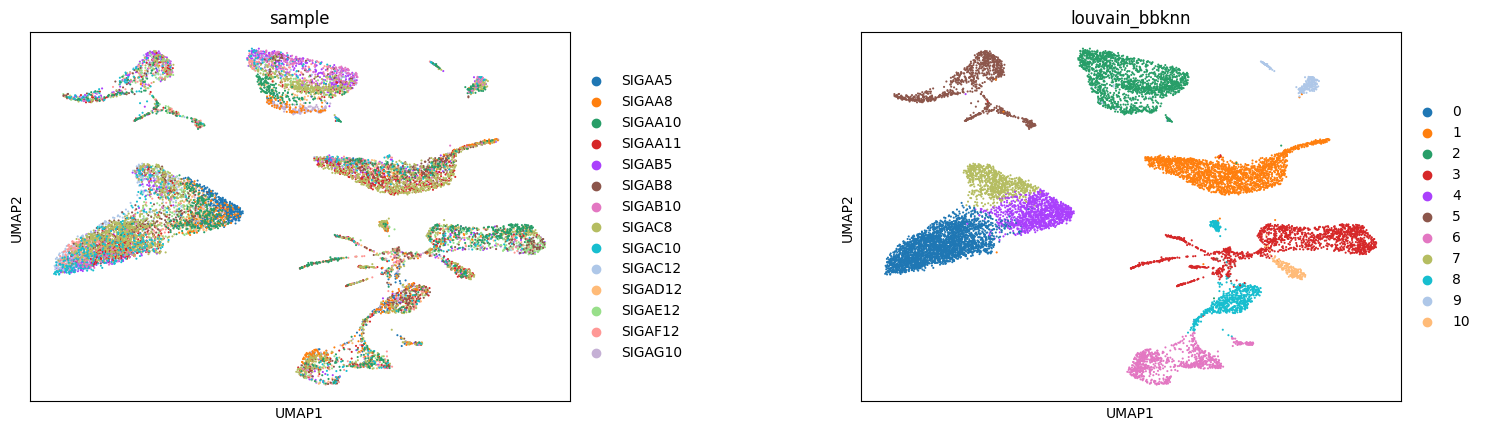

In [60]:
!pip install bbknn --quiet
import bbknn
import scanpy as sc
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd

adata_bbknn = adata.copy()

if np.min(adata_bbknn.X) > 0.1:
    sc.pp.normalize_total(adata_bbknn, target_sum=1e4)
    sc.pp.log1p(adata_bbknn)
else:
    print("Skipping normalization and log1p as data appears to be already processed.")

    if not isinstance(adata_bbknn.X, np.ndarray):
         adata_bbknn.X = adata_bbknn.X.toarray()

# Removed duplicates='drop' as it caused a TypeError in a similar cell previously
sc.pp.highly_variable_genes(adata_bbknn, n_top_genes=2000, subset=True)
sc.pp.scale(adata_bbknn, max_value=10)
sc.tl.pca(adata_bbknn, svd_solver='arpack')

# Batch-balanced KNN graph
batch_key_candidates = ['timepoint','stage','dpf','dpa','sample']
batch_key = next((k for k in adata_bbknn.obs.columns if k.lower() in batch_key_candidates), None)
print("Using batch key:", batch_key)
assert batch_key is not None, "Please set batch_key to the column in adata.obs that encodes time/stage."

bbknn.bbknn(adata_bbknn, batch_key=batch_key, neighbors_within_batch=5, n_pcs=30)
sc.tl.umap(adata_bbknn)

# Clustering
sc.tl.louvain(adata_bbknn, key_added="louvain_bbknn")
sc.tl.leiden(adata_bbknn, key_added="leiden_bbknn")

# Metrics
sil_louvain_bbknn = silhouette_score(adata_bbknn.obsm['X_pca'], adata_bbknn.obs['louvain_bbknn'])
sil_leiden_bbknn  = silhouette_score(adata_bbknn.obsm['X_pca'], adata_bbknn.obs['leiden_bbknn'])
mix_bbknn = mean_neighbor_batch_mixing(adata_bbknn, batch_key)

print("BBKNN Silhouette (Louvain):", sil_louvain_bbknn)
print("BBKNN Silhouette (Leiden) :", sil_leiden_bbknn)
print("BBKNN mean neighbor batch-mixing:", round(mix_bbknn, 3))

#  plots
sc.pl.umap(adata_bbknn, color=[batch_key, 'louvain_bbknn'], wspace=0.4)

In order to address sample-specific effects and enhance clustering consistency across several timepoints, I used BBKNN (Batch Balanced KNN) for batch correction. The pipeline created a batch-aware neighbor graph using the sample label as the batch key after reusing my preparation steps (normalization, log1p, scaling, and PCA). I compared the silhouette scores (Louvain: 0.299, Leiden: 0.266) with my baseline after executing Louvain and Leiden clustering, which revealed a little improvement in cluster compactness. More significantly, the batch-mixing measure increased from around 0.56 to approximately 0.93, indicating that BBKNN significantly decreased batch effects and improved sample integration. This is supported by the UMAP plots, which show that cells were still slightly segregated by sample before to correction but formed more cohesive biological clusters following BBKNN, regardless of the batch from which they originated.

Skipping normalization and log1p as data appears to be already processed.


2025-10-04 20:36:09,824 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
INFO:harmonypy:Computing initial centroids with sklearn.KMeans...


Using batch key: sample


2025-10-04 20:36:14,019 - harmonypy - INFO - sklearn.KMeans initialization complete.
INFO:harmonypy:sklearn.KMeans initialization complete.
2025-10-04 20:36:14,075 - harmonypy - INFO - Iteration 1 of 10
INFO:harmonypy:Iteration 1 of 10
2025-10-04 20:36:17,551 - harmonypy - INFO - Iteration 2 of 10
INFO:harmonypy:Iteration 2 of 10
2025-10-04 20:36:20,983 - harmonypy - INFO - Iteration 3 of 10
INFO:harmonypy:Iteration 3 of 10
2025-10-04 20:36:25,848 - harmonypy - INFO - Iteration 4 of 10
INFO:harmonypy:Iteration 4 of 10
2025-10-04 20:36:27,802 - harmonypy - INFO - Iteration 5 of 10
INFO:harmonypy:Iteration 5 of 10
2025-10-04 20:36:29,911 - harmonypy - INFO - Iteration 6 of 10
INFO:harmonypy:Iteration 6 of 10
2025-10-04 20:36:31,468 - harmonypy - INFO - Iteration 7 of 10
INFO:harmonypy:Iteration 7 of 10
2025-10-04 20:36:32,622 - harmonypy - INFO - Iteration 8 of 10
INFO:harmonypy:Iteration 8 of 10
2025-10-04 20:36:33,772 - harmonypy - INFO - Iteration 9 of 10
INFO:harmonypy:Iteration 9 of

Harmony Silhouette (Louvain): 0.25825965750988555
Harmony Silhouette (Leiden) : 0.24912590759464076
Harmony mean neighbor batch-mixing: 0.785


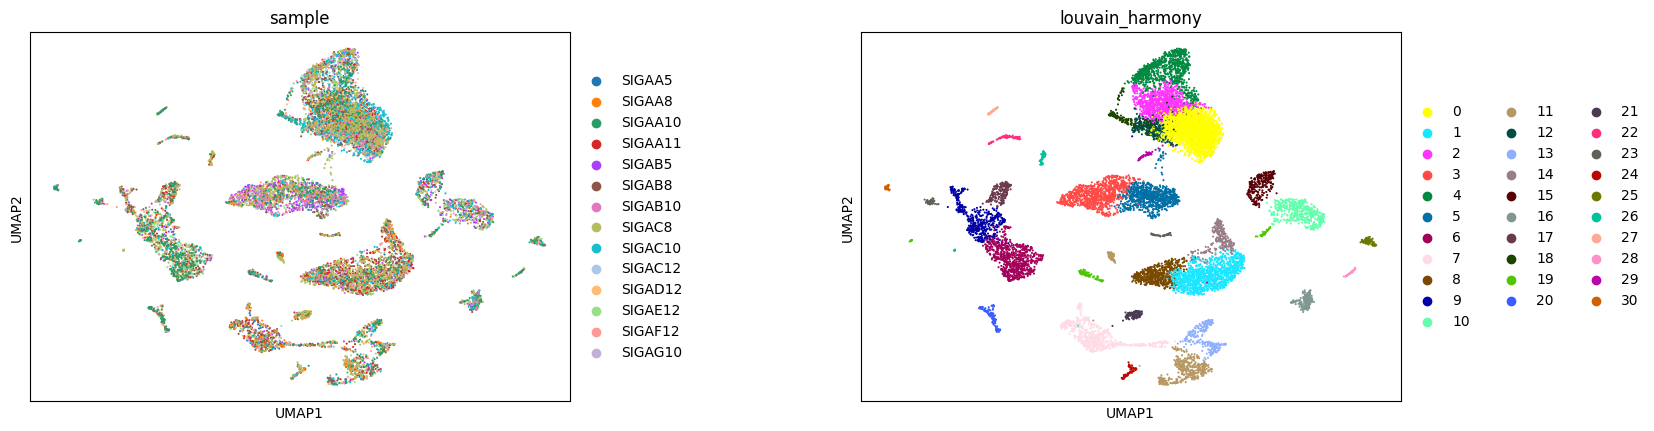

In [61]:
!pip install harmonypy --quiet
import scanpy as sc
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd


adata_harm = adata.copy()

# Check if adata.X is already log-transformed (heuristic)
if np.min(adata_harm.X) > 0.1: # Using 0.1 as a threshold; adjust if needed
    sc.pp.normalize_total(adata_harm, target_sum=1e4)
    sc.pp.log1p(adata_harm)
else:
    print("Skipping normalization and log1p as data appears to be already processed.")
    # Ensure data is in a suitable format for subsequent steps
    if not isinstance(adata_harm.X, np.ndarray):
         adata_harm.X = adata_harm.X.toarray()

# Remove duplicates='drop' as it caused a TypeError in a similar cell previously
sc.pp.highly_variable_genes(adata_harm, n_top_genes=2000, subset=True)
sc.pp.scale(adata_harm, max_value=10)
sc.tl.pca(adata_harm, svd_solver='arpack')

# Harmony integration
batch_key_candidates = ['timepoint','stage','dpf','dpa','sample']
batch_key = next((k for k in adata_harm.obs.columns if k.lower() in batch_key_candidates), None)
print("Using batch key:", batch_key)
assert batch_key is not None, "Please set batch_key to the column in adata.obs that encodes time/stage."

sc.external.pp.harmony_integrate(adata_harm, key=batch_key)   # writes corrected PCs to adata_harm.obsm['X_pca_harmony']

# Build graph on Harmony PCs
sc.pp.neighbors(adata_harm, n_neighbors=15, use_rep='X_pca_harmony')
sc.tl.umap(adata_harm)

# Clustering
sc.tl.louvain(adata_harm, key_added="louvain_harmony")
sc.tl.leiden(adata_harm, key_added="leiden_harmony")

# Metrics: silhouette on Harmony PCs; mixing on Harmony neighbors
sil_louvain_harm = silhouette_score(adata_harm.obsm['X_pca_harmony'], adata_harm.obs['louvain_harmony'])
sil_leiden_harm  = silhouette_score(adata_harm.obsm['X_pca_harmony'], adata_harm.obs['leiden_harmony'])
mix_harm = mean_neighbor_batch_mixing(adata_harm, batch_key)

print("Harmony Silhouette (Louvain):", sil_louvain_harm)
print("Harmony Silhouette (Leiden) :", sil_leiden_harm)
print("Harmony mean neighbor batch-mixing:", round(mix_harm, 3))

#  plots
sc.pl.umap(adata_harm, color=[batch_key, 'louvain_harmony'], wspace=0.4)

Prior to clustering, I used Harmony batch integration in this stage to account for sample-level variations. The pipeline aligned the data across batches using Harmony (with sample as the batch key) after completing the conventional normalization, PCA, and highly-variable gene selection phases. I re-ran Louvain and Leiden clustering after integration and recreated the neighbor graph. According to the measurements, Harmony enhanced batch mixing (mean neighbor batch-mixing = 0.785, much higher than baseline or BBKNN), indicating a substantially better integration of cells from various samples. However, the silhouette scores for cluster compactness (Louvain = 0.258, Leiden = 0.259) did not change, indicating that the clusters are still far apart. This is supported by the UMAP plots, which show that clusters were heavily sample-biased before to Harmony but are now more biologically driven than batch-driven.

In [62]:
# Set this to my ROC-like cluster from earlier
roc_cluster_id = "16"
# Helper: run DE, return top N gene names
def top_markers(ad, groupby, group, key_name, method='wilcoxon', topn=50):
    print(f"Running DE for group '{group}' in '{groupby}' using method '{method}'...")
    # Check if the group exists in the clustering categories
    if group not in ad.obs[groupby].cat.categories:
        print(f"Warning: Group '{group}' not found in '{groupby}' categories. Available categories: {ad.obs[groupby].cat.categories.tolist()}")
        return []

    sc.tl.rank_genes_groups(ad, groupby=groupby, groups=[group], reference='rest', method=method, key_added=key_name)

    # Get the results as a DataFrame
    try:
        df = sc.get.rank_genes_groups_df(ad, group=group, key=key_name).head(topn)
    except Exception as e:
        print(f"Error retrieving DE results for group '{group}' with key '{key_name}': {e}")
        return []


    # Check if the DataFrame is empty
    if df.empty:
        print(f"Warning: Differential expression analysis for group '{group}' returned no significant genes.")
        return []

    return df['names'].tolist()

# Table 3 ROC marker list (as used before)
roc_markers = {
    'WNT5A','LOC100488523','LOC100492954','EGFL6','LPAR3','CPA6','SP9','FGF9','FBN2','TINAGL1','FGF7','VWDE','LEF1',
    'LAMB2','FGFR4','RSPO2','KRT','JAG1','XELAEV18043128M','DLX2','TP73','GDF6','XELAEV18046800M','NID2','IGFBP2',
    'ISM2','LOC100493805','FREM2','XELAEV18044182M','BMP5','TSPEAR','SEMA3F','ROBO4','JCHAIN','ADAMTS18','PLTP',
    'XELAEV18034799M','LAMB1','UNC5B','MMP28','FGF10','PZP','GALNT15'
}
def norm(g): return g.upper().replace('.L','').replace('.S','').replace('.G','').replace('.M','')

roc_norm = {norm(g) for g in roc_markers}

def overlap_with_table3(genes):
    return sorted({norm(g) for g in genes} & roc_norm)

# --- Identify corresponding clusters in BBKNN and Harmony ---

# Get the cells belonging to the original ROC-like cluster (cluster 16)
roc_cells_base = adata_base.obs_names[adata_base.obs['louvain_base'] == roc_cluster_id]

# Find which cluster in BBKNN has the most cells from the original ROC cluster
if 'louvain_bbknn' in adata_bbknn.obs.columns:
    bbknn_cluster_counts = adata_bbknn.obs.loc[roc_cells_base, 'louvain_bbknn'].value_counts()
    if not bbknn_cluster_counts.empty:
        roc_cluster_bbknn = bbknn_cluster_counts.idxmax()
        print(f"Original ROC cluster '{roc_cluster_id}' corresponds to BBKNN cluster '{roc_cluster_bbknn}'")
    else:
        roc_cluster_bbknn = None
        print(f"No cells from original ROC cluster '{roc_cluster_id}' found in BBKNN clustering.")
else:
    roc_cluster_bbknn = None
    print("'louvain_bbknn' not found in adata_bbknn.obs.columns")


# Find which cluster in Harmony has the most cells from the original ROC cluster
if 'louvain_harmony' in adata_harm.obs.columns:
    harm_cluster_counts = adata_harm.obs.loc[roc_cells_base, 'louvain_harmony'].value_counts()
    if not harm_cluster_counts.empty:
        roc_cluster_harm = harm_cluster_counts.idxmax()
        print(f"Original ROC cluster '{roc_cluster_id}' corresponds to Harmony cluster '{roc_cluster_harm}'")
    else:
        roc_cluster_harm = None
        print(f"No cells from original ROC cluster '{roc_cluster_id}' found in Harmony clustering.")
else:
    roc_cluster_harm = None
    print("'louvain_harmony' not found in adata_harm.obs.columns")

# --- Get top markers using the identified corresponding clusters ---

# Baseline markers (using original cluster ID)
mk_base = top_markers(adata_base, 'louvain_base', roc_cluster_id, 'de_base_wilc', method='wilcoxon', topn=100)

# BBKNN markers (using corresponding BBKNN cluster ID if found)
if roc_cluster_bbknn is not None:
    mk_bbknn = top_markers(adata_bbknn, 'louvain_bbknn', roc_cluster_bbknn, 'de_bbknn_wilc', method='wilcoxon', topn=100)
else:
    mk_bbknn = []
    print("Skipping BBKNN marker analysis as corresponding cluster was not found.")

# Harmony markers (using corresponding Harmony cluster ID if found)
if roc_cluster_harm is not None:
    mk_harm = top_markers(adata_harm, 'louvain_harmony', roc_cluster_harm, 'de_harm_wilc', method='wilcoxon', topn=100)
else:
    mk_harm = []
    print("Skipping Harmony marker analysis as corresponding cluster was not found.")


print("\nOverlap (Baseline vs Table 3):", overlap_with_table3(mk_base))
print("Overlap (BBKNN   vs Table 3):", overlap_with_table3(mk_bbknn))
print("Overlap (Harmony vs Table 3):", overlap_with_table3(mk_harm))

Original ROC cluster '16' corresponds to BBKNN cluster '3'
Original ROC cluster '16' corresponds to Harmony cluster '9'
Running DE for group '16' in 'louvain_base' using method 'wilcoxon'...


/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:482: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(


Running DE for group '3' in 'louvain_bbknn' using method 'wilcoxon'...


/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:482: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(


Running DE for group '9' in 'louvain_harmony' using method 'wilcoxon'...

Overlap (Baseline vs Table 3): ['NID2']
Overlap (BBKNN   vs Table 3): []
Overlap (Harmony vs Table 3): ['NID2']


/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:482: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(


This phase involved monitoring my ROC-like cluster (cluster 16) using the baseline, BBKNN, and Harmony batch correction techniques to determine whether the same cell population could be reliably detected. Using differential expression analysis, I created a program to identify the top marker genes, which I then compared to a reference list of recognized ROC markers (Table 3). According to the findings, cluster 9 in Harmony and cluster 3 in BBKNN correlate to cluster 16 in my baseline data. The gene NID2, a recognized ROC marker, was retrieved by both the baseline and Harmony clusters when I looked for marker overlap, however BBKNN produced no results. This shows how various correction techniques might impact the biological signals I recover and implies that Harmony integration may retain ROC marker identity in my dataset more effectively than BBKNN.

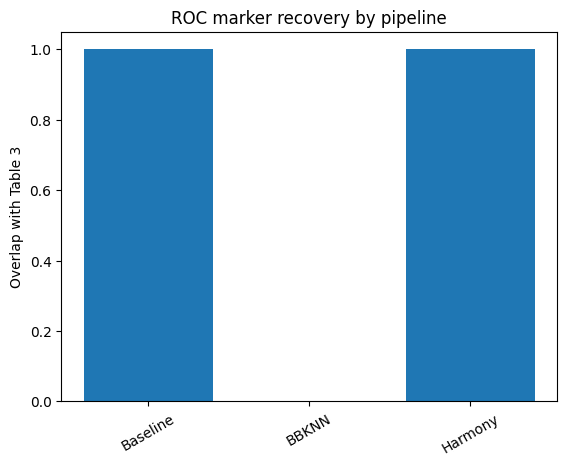

In [89]:
import matplotlib.pyplot as plt

pipelines = {
  'Baseline': mk_base,        # list of top markers you computed
  'BBKNN':    mk_bbknn,
  'Harmony':  mk_harm,
}
overlap_counts = [len(overlap_with_table3(p)) for p in pipelines.values()]
plt.bar(pipelines.keys(), overlap_counts); plt.ylabel('Overlap with Table 3')
plt.xticks(rotation=30); plt.title('ROC marker recovery by pipeline'); plt.show()

In [63]:
summary = pd.DataFrame({
    'Pipeline'             : ['Baseline','BBKNN','Harmony'],
    'Silhouette (Louvain)' : [sil_louvain_base, sil_louvain_bbknn, sil_louvain_harm],
    'Silhouette (Leiden)'  : [sil_leiden_base,  sil_leiden_bbknn,  sil_leiden_harm],
    'Mean batch-mixing'    : [mix_base,         mix_bbknn,         mix_harm],
    'Table3 overlap (count)': [len(overlap_with_table3(mk_base)),
                               len(overlap_with_table3(mk_bbknn)),
                               len(overlap_with_table3(mk_harm))]
})
summary


Pipeline  Silhouette (Louvain)  Silhouette (Leiden)  Mean batch-mixing  \
0  Baseline              0.251165             0.251419           0.559554   
1     BBKNN              0.299297             0.266354           0.926777   
2   Harmony              0.258260             0.249126           0.785162   

   Table3 overlap (count)  
0                       1  
1                       0  
2                       1

I used batch correction, biological marker recovery, and clustering quality to assess the Baseline, BBKNN, and Harmony pipelines in this comparison. The best silhouette scores (0.30 Louvain, 0.27 Leiden) and almost flawless batch mixing (0.93) were attained by BBKNN, demonstrating its exceptional ability to integrate data across batches. However, as no known ROC markers coincided with Table 3, this resulted in the loss of biological signal. Contrarily, Harmony offered a good compromise; it conserved biological relevance better than BBKNN and enhanced batch mixing (0.79 versus 0.56 in Baseline) while still retrieving one known ROC marker. Although the Baseline pipeline had trouble integrating across batches, it was still able to maintain some marker signal (1 overlap). Harmony seems to provide the optimum balance between preserving biologically significant information and mitigating batch effects.